In [1]:
!cp /content/drive/MyDrive/Colab/Data/'Готовые задачи'/Калининград/participants/train/train.csv ./ 
!cp /content/drive/MyDrive/Colab/Data/'Готовые задачи'/Калининград/participants/test/test.csv ./ 

cp: cannot stat '/content/drive/MyDrive/Colab/Data/'\'''$'\320\223\320\276\321\202\320\276\320\262\321\213\320\265'' '$'\320\267\320\260\320\264\320\260\321\207\320\270'\''/'$'\320\232\320\260\320\273\320\270\320\275\320\270\320\275\320\263\321\200\320\260\320\264''/participants/train/train.csv': No such file or directory
cp: cannot stat '/content/drive/MyDrive/Colab/Data/'\'''$'\320\223\320\276\321\202\320\276\320\262\321\213\320\265'' '$'\320\267\320\260\320\264\320\260\321\207\320\270'\''/'$'\320\232\320\260\320\273\320\270\320\275\320\270\320\275\320\263\321\200\320\260\320\264''/participants/test/test.csv': No such file or directory


In [2]:
#Установка catboost
!pip install catboost


  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [3]:
#import необходимых модулей

import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
#Считывание данных в DataFrame 

train = pd.read_csv('train.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str, 'PATIENT_ID_COUNT':int})
test = pd.read_csv('test.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str})

In [5]:
#Отделение меток от данных

X = train[['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY']]
y = train[['PATIENT_ID_COUNT']]

In [274]:
train['month_year'] = pd.to_datetime(train.loc[:, 'VISIT_MONTH_YEAR'], format='%m.%y', errors='ignore')

In [275]:
train

PATIENT_SEX MKB_CODE        ADRES VISIT_MONTH_YEAR AGE_CATEGORY  \
0                 0    A00.0     Гурьевск            08.21        young   
1                 0    A00.0  Калининград            03.20     children   
2                 0      A00        Гусев            03.19     children   
3                 0      A00  Калининград            01.22     children   
4                 0      A00  Калининград            02.18     children   
...             ...      ...          ...              ...          ...   
2212388           1    Z99.1     Гурьевск            12.21     children   
2212389           1    Z99.8  Калининград            10.21        young   
2212390           1    Z99.9  Калининград            04.19     children   
2212391           1    Z99.9  Калининград            08.19     children   
2212392           1    Z99.9  Калининград            11.19     children   

         PATIENT_ID_COUNT month_year  
0                       1 2021-08-01  
1                       1 2020-03-01  
2                       1 2019-03-01  
3                       1 2022-01-01  
4                       1 2018-02-01  
...                   ...        ...  
2212388                 1 2021-12-01  
2212389                 1 2021-10-01  
2212390                 2 2019-04-01  
2212391                 1 2019-08-01  
2212392                 1 2019-11-01  

[2212393 rows x 7 columns]

In [8]:
unique_months = X['VISIT_MONTH_YEAR'].unique().astype('str')

In [9]:
unique_months

array(['08.21', '03.20', '03.19', '01.22', '02.18', '03.22', '07.18',
       '09.21', '10.19', '12.21', '05.18', '01.19', '05.19', '12.20',
       '06.18', '10.20', '06.20', '11.19', '12.19', '02.19', '02.22',
       '04.19', '05.21', '07.21', '01.20', '01.18', '02.20', '03.18',
       '03.21', '04.18', '04.20', '04.21', '05.20', '06.19', '06.21',
       '07.19', '07.20', '08.18', '08.19', '08.20', '09.18', '09.19',
       '09.20', '10.18', '10.21', '11.18', '11.20', '11.21', '12.18',
       '01.21', '02.21'], dtype='<U5')

In [10]:
df_uniq_months = pd.to_datetime(unique_months, format='%m.%y', errors='ignore')

In [11]:
df_uniq_months.sort_values()

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', freq=None)

In [12]:
df_uniq_months.sort_values(ascending=True)

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', freq=None)

In [13]:
uniq_city = X['ADRES'].unique()

In [14]:
print(uniq_city)

['Гурьевск' 'Калининград' 'Гусев' 'Нестеров' 'Партизанское' 'Садовое'
 'Славск' 'Ясная Поляна' 'Гвардейск' 'Холмогоровка' 'Багратионовск'
 'Большое Исаково' 'Зеленоградск' 'Калининградская' 'Колосовка'
 'Краснознаменск' 'Невское' 'Неман' 'Пионерский' 'Правдинск' 'Прибрежный'
 'СТ Железнодорожник' 'СТ Искра ул. Тюльпановая' 'СТ Победа' 'Светлый'
 'Советск' 'Совхозное' 'Черняховск' 'Балтийск' 'Малое Васильково'
 'Полесск' 'Сосновка' 'Ладушкин' 'Малинники' 'Раздольное' 'Озерск'
 'Волочаевское' 'Мамоново' 'Нивенское' 'Светлогорск' 'Васильково'
 'Голубево' 'Долгоруково' 'Донское' 'Дружный' 'Заозерье' 'Корнево'
 'Ласкино' 'Луговое' 'Люблино' 'Малиновка' 'Малое Исаково' 'Матросово'
 'Озерки' 'Переславское' 'Пятидорожное' 'СТ Колосок' 'СТ Радуга'
 'Саранское' 'Славинск' 'Славянское' 'Ушаково' 'Янтарный' 'Ясное'
 'Илюшино' 'Шоссейное' 'Южный' 'Петрово' 'Некрасово' 'Березовка'
 'Большаково' 'Высокое' 'Домново' 'Дорожный' 'Железнодорожный' 'Знаменск'
 'Коврово' 'Комсомольск' 'Константиновка' 'Кры

In [85]:
# TODO: get population by city name

In [ ]:
# TODO: get lat, lon by city name

In [ ]:
# TODO: get weather record by city name

In [ ]:
# TODO: research periodicity

In [86]:
# TODO: EDA

In [127]:
train.head()

PATIENT_SEX MKB_CODE        ADRES VISIT_MONTH_YEAR AGE_CATEGORY  \
0           0    A00.0     Гурьевск            08.21        young   
1           0    A00.0  Калининград            03.20     children   
2           0      A00        Гусев            03.19     children   
3           0      A00  Калининград            01.22     children   
4           0      A00  Калининград            02.18     children   

   PATIENT_ID_COUNT  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [135]:
train.groupby('PATIENT_SEX').sum('PATIENT_ID_COUNT')

PATIENT_ID_COUNT
PATIENT_SEX                  
0                     7988811
1                     4948939

In [138]:
train.groupby('AGE_CATEGORY').sum('PATIENT_ID_COUNT').sort_values(by='PATIENT_ID_COUNT', ascending=False)

PATIENT_ID_COUNT
AGE_CATEGORY                  
children               4187970
young                  3100989
elderly                2670328
middleage              1942558
old                     888505
centenarians            147400

In [139]:
train.groupby('ADRES').sum('PATIENT_ID_COUNT').sort_values(by='PATIENT_ID_COUNT', ascending=False)

PATIENT_ID_COUNT
ADRES                               
Калининград                  8615298
Гурьевск                      559127
Пионерский                    306848
Советск                       291640
Черняховск                    263656
...                              ...
Ясная Поляна                    3432
Ново-Московское                 3409
Рыбачий                         3405
Гурьевский                      3337
СТ Железнодорожник              3176

[118 rows x 1 columns]

In [140]:
train.groupby('VISIT_MONTH_YEAR').sum('PATIENT_ID_COUNT').sort_values(by='PATIENT_ID_COUNT', ascending=False)

PATIENT_ID_COUNT
VISIT_MONTH_YEAR                  
10.21                       347865
12.21                       345437
11.21                       328531
09.21                       328436
07.21                       316501
08.21                       313895
04.21                       313055
06.21                       311045
10.19                       304796
05.21                       294018
04.19                       290365
10.18                       287364
12.19                       282251
09.19                       280559
02.19                       279467
03.21                       275785
03.19                       275218
11.18                       272947
11.19                       269928
10.20                       263960
03.18                       263285
07.19                       262111
03.22                       261884
09.20                       261412
12.18                       259683
08.19                       258120
04.18                       258038
02.18                       255036
09.18                       253018
05.19                       243530
08.18                       242724
02.20                       241591
06.19                       240687
01.19                       240650
07.18                       239620
06.18                       238109
05.18                       237447
12.20                       234672
03.20                       233576
08.20                       225479
11.20                       224981
02.21                       223190
01.18                       221854
07.20                       217798
02.22                       196348
01.22                       190701
01.20                       189966
06.20                       173373
01.21                       150000
04.20                       111634
05.20                       105810

In [16]:
import matplotlib.pyplot as plt

In [31]:
mkb_count = train.groupby('MKB_CODE').sum('PATIENT_ID_COUNT').reset_index()

In [32]:
mkb_count.describe()

PATIENT_ID_COUNT
count       7644.000000
mean        1692.536630
std        17989.725347
min            1.000000
25%            6.000000
50%           40.000000
75%          284.000000
max       919789.000000

In [33]:
mkb_count.index

RangeIndex(start=0, stop=7644, step=1)

In [43]:
mkb_count.sort_values(by=['PATIENT_ID_COUNT'], ascending=False, inplace=True)

In [44]:
mkb_count.head()

MKB_CODE  PATIENT_ID_COUNT
2847    J06.9            919789
7268    Z25.8            663351
7123    Z00.0            611981
2506    I11.9            350152
3066    K02.1            316946

In [46]:
mkb_count.query('PATIENT_ID_COUNT > 10000')

MKB_CODE  PATIENT_ID_COUNT
2847    J06.9            919789
7268    Z25.8            663351
7123    Z00.0            611981
2506    I11.9            350152
3066    K02.1            316946
...       ...               ...
2385    H65.1             10087
3256    K42.9             10079
2118    G93.8             10054
1575    F11.2             10050
4036    M54.9             10019

[202 rows x 2 columns]

In [68]:
mkb_count.query('PATIENT_ID_COUNT > 10000').iloc[0:10,0]

2847    J06.9
7268    Z25.8
7123    Z00.0
2506    I11.9
3066    K02.1
7200    Z11.5
7150    Z02.7
7124    Z00.1
2833    J02.9
7134    Z01.2
Name: MKB_CODE, dtype: object

In [73]:
type(mkb_count.query('PATIENT_ID_COUNT > 10000').iloc[:, 0])

pandas.core.series.Series

In [76]:
mkb_top_list = mkb_count.query('PATIENT_ID_COUNT > 10000').iloc[:, 0].tolist()

In [78]:
mkb_top_list

['J06.9',
 'Z25.8',
 'Z00.0',
 'I11.9',
 'K02.1',
 'Z11.5',
 'Z02.7',
 'Z00.1',
 'J02.9',
 'Z01.2',
 'K04.5',
 'J00',
 'M42.1',
 'K04.0',
 'Z01.4',
 'J06.8',
 'Z01.7',
 'I67.8',
 'Z00',
 'J04.1',
 'Z11.3',
 'N60.1',
 'Z01.0',
 'K04.4',
 'Z20.8',
 'H52.1',
 'K02.8',
 'Z11.1',
 'J20.9',
 'Z01.1',
 'Z02.5',
 'N95.2',
 'Z00.8',
 'I67.9',
 'I67.2',
 'M54.4',
 'Z71.2',
 'Z25.1',
 'O99.8',
 'G93.4',
 'H40.1',
 'G90.8',
 'Z01.8',
 'K59.9',
 'K07.3',
 'I25.8',
 'N40',
 'H25.0',
 'F10.2',
 'H61.2',
 'G90.9',
 'Z02.0',
 'I25.1',
 'M54.5',
 'Z76.0',
 'K02.0',
 'Z27.3',
 'J18.9',
 'I83.9',
 'N76.0',
 'K07.2',
 'Z27.8',
 'M95.8',
 'M54.2',
 'I20.8',
 'I25.2',
 'M42.9',
 'M17.0',
 'K29.9',
 'C61',
 'H90.3',
 'Z34.8',
 'E06.3',
 'L23.9',
 'J45.8',
 'Z03.8',
 'B01.9',
 'H35.3',
 'F20.0',
 'E04.2',
 'M54.1',
 'C50.4',
 'M17.1',
 'H25.8',
 'J35.0',
 'K81.1',
 'M21.4',
 'I70.2',
 'H52.0',
 'H52.2',
 'I10',
 'B07',
 'J03.9',
 'O99.0',
 'S93.4',
 'D25.1',
 'Z00.4',
 'Z03.0',
 'K29.5',
 'M51.1',
 'S60.0',
 '

J06.9 ОРВИ
Z25.8 Необходимость иммунизации против одной из других вирусных болезней (коронавирус?)
Z00.0 Общий медицинский осмотр
I11.9 

In [79]:
!pip install icd10-cm

In [80]:
import icd10

code = icd10.find("J20.0")
print(code.description)         # Acute bronchitis due to Mycoplasma pneumoniae
if code.billable:
    print(code, "is billable")  # J20.0 is billable

print(code.chapter)             # X
print(code.block)               # J00-J99
print(code.block_description)   # Diseases of the respiratory system

Acute bronchitis due to Mycoplasma pneumoniae
J20.0 is billable
X
J00-J99
Diseases of the respiratory system


In [81]:
import icd10

if icd10.exists("J20.0"):
    print("Exists")

Exists


In [113]:
mkb_top_name_dict = {}

In [114]:
for mkb in mkb_top_list:
    code = icd10.find(mkb)
    mkb_top_name_dict[mkb] = code.description if code is not None else 'NOT FOUND'

In [115]:
mkb_top_name_dict

{'J06.9': 'Acute upper respiratory infection, unspecified',
 'Z25.8': 'NOT FOUND',
 'Z00.0': 'Encounter for general adult medical examination',
 'I11.9': 'Hypertensive heart disease without heart failure',
 'K02.1': 'NOT FOUND',
 'Z11.5': 'Encounter for screening for other viral diseases',
 'Z02.7': 'Encounter for issue of medical certificate',
 'Z00.1': 'Encounter for newborn, infant and child health examinations',
 'J02.9': 'Acute pharyngitis, unspecified',
 'Z01.2': 'Encounter for dental examination and cleaning',
 'K04.5': 'Chronic apical periodontitis',
 'J00': 'Acute nasopharyngitis [common cold]',
 'M42.1': 'Adult osteochondrosis of spine',
 'K04.0': 'Pulpitis',
 'Z01.4': 'Encounter for gynecological examination',
 'J06.8': 'NOT FOUND',
 'Z01.7': 'NOT FOUND',
 'I67.8': 'Other specified cerebrovascular diseases',
 'Z00': 'Encounter for general examination without complaint, suspected or reported diagnosis',
 'J04.1': 'Acute tracheitis',
 'Z11.3': 'Encounter for screening for infe

In [119]:
mkb_top_name_dict['K58.9']

'Irritable bowel syndrome without diarrhea'

In [94]:
!pip install simple-icd-10

In [95]:
import simple_icd_10 as icd

In [96]:
icd.get_description("XII")

'Diseases of the skin and subcutaneous tissue'

In [103]:
mkb_top_name_simple_dict = {}
cnt_err = 0
for mkb in mkb_top_list:
    try:
        mkb_desc = icd.get_description(mkb)
        
        mkb_top_name_simple_dict[mkb] = mkb_desc
    except ValueError as e:
        mkb_top_name_simple_dict[mkb] = 'NOT FOUND'
        print(mkb)
        cnt_err += 1

print(cnt_err)

K58.9
1


In [101]:
mkb_top_name_simple_dict

{'J06.9': 'Acute upper respiratory infection, unspecified',
 'Z25.8': 'Need for immunization against other specified single viral diseases',
 'Z00.0': 'General medical examination',
 'I11.9': 'Hypertensive heart disease without (congestive) heart failure',
 'K02.1': 'Caries of dentine',
 'Z11.5': 'Special screening examination for other viral diseases',
 'Z02.7': 'Issue of medical certificate',
 'Z00.1': 'Routine child health examination',
 'J02.9': 'Acute pharyngitis, unspecified',
 'Z01.2': 'Dental examination',
 'K04.5': 'Chronic apical periodontitis',
 'J00': 'Acute nasopharyngitis [common cold]',
 'M42.1': 'Adult osteochondrosis of spine',
 'K04.0': 'Pulpitis',
 'Z01.4': 'Gynaecological examination (general)(routine)',
 'J06.8': 'Other acute upper respiratory infections of multiple sites',
 'Z01.7': 'Laboratory examination',
 'I67.8': 'Other specified cerebrovascular diseases',
 'Z00': 'General examination and investigation of persons without complaint and reported diagnosis',
 'J

In [123]:
for mkb_code, mkb_name in mkb_top_name_simple_dict.items():
    if mkb_name == 'NOT FOUND':
        print(mkb_code, mkb_name, sep=':')

K58.9:NOT FOUND


In [124]:
mkb_top_name_simple_dict['K58.9'] = mkb_top_name_dict['K58.9']

In [125]:
for mkb_code, mkb_name in mkb_top_name_simple_dict.items():
    if mkb_name == 'NOT FOUND':
        print(mkb_code, mkb_name, sep=':')

In [126]:
mkb_top_name_simple_dict

{'J06.9': 'Acute upper respiratory infection, unspecified',
 'Z25.8': 'Need for immunization against other specified single viral diseases',
 'Z00.0': 'General medical examination',
 'I11.9': 'Hypertensive heart disease without (congestive) heart failure',
 'K02.1': 'Caries of dentine',
 'Z11.5': 'Special screening examination for other viral diseases',
 'Z02.7': 'Issue of medical certificate',
 'Z00.1': 'Routine child health examination',
 'J02.9': 'Acute pharyngitis, unspecified',
 'Z01.2': 'Dental examination',
 'K04.5': 'Chronic apical periodontitis',
 'J00': 'Acute nasopharyngitis [common cold]',
 'M42.1': 'Adult osteochondrosis of spine',
 'K04.0': 'Pulpitis',
 'Z01.4': 'Gynaecological examination (general)(routine)',
 'J06.8': 'Other acute upper respiratory infections of multiple sites',
 'Z01.7': 'Laboratory examination',
 'I67.8': 'Other specified cerebrovascular diseases',
 'Z00': 'General examination and investigation of persons without complaint and reported diagnosis',
 'J

In [143]:
mkb_count

MKB_CODE  PATIENT_ID_COUNT
2847    J06.9            919789
7268    Z25.8            663351
7123    Z00.0            611981
2506    I11.9            350152
3066    K02.1            316946
...       ...               ...
5028    P81.0                 1
1478    E76.9                 1
1480    E77.8                 1
6058    S37.6                 1
4929    P00.9                 1

[7644 rows x 2 columns]

In [155]:
mkb_top_plot = mkb_count.query('PATIENT_ID_COUNT > 10000').loc[:, ['MKB_CODE', 'PATIENT_ID_COUNT']].reset_index(drop=True)

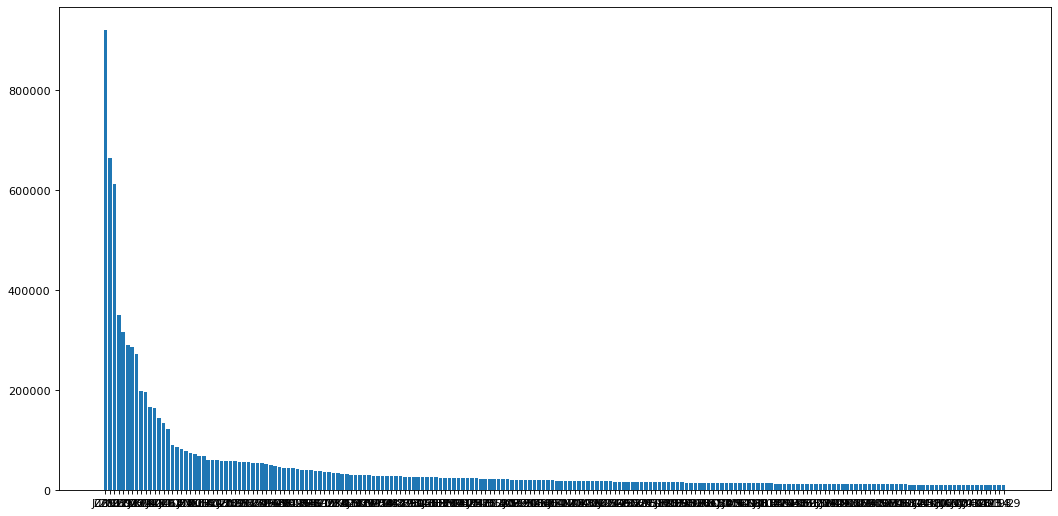

In [158]:
plt.figure(figsize=(16, 8), dpi=80)
plt.bar(mkb_top_plot['MKB_CODE'], mkb_top_plot['PATIENT_ID_COUNT'])
plt.show()

In [161]:
train.groupby(['ADRES', 'MKB_CODE']).value_counts()

ADRES          MKB_CODE  PATIENT_SEX  VISIT_MONTH_YEAR  AGE_CATEGORY  PATIENT_ID_COUNT
Багратионовск  A02.0     0            12.20             elderly       1                   1
               A02.9     0            10.19             children      1                   1
               A04.3     0            02.22             middleage     1                   1
               A04.9     1            06.21             young         1                   1
                                      03.18             young         1                   1
                                                                                         ..
Ясное          Z45       1            04.18             middleage     1                   1
               Z54.0     0            01.19             young         1                   1
               Z71.2     1            04.19             young         1                   1
               Z71.8     0            07.18             centenarians  1              

In [276]:
top_mkb = train.query('ADRES == "Калининград" & MKB_CODE == "J06.9"')
top_mkb

PATIENT_SEX MKB_CODE        ADRES VISIT_MONTH_YEAR  AGE_CATEGORY  \
509571            0    J06.9  Калининград            01.18  centenarians   
509572            0    J06.9  Калининград            01.18      children   
509573            0    J06.9  Калининград            01.18       elderly   
509574            0    J06.9  Калининград            01.18     middleage   
509575            0    J06.9  Калининград            01.18           old   
...             ...      ...          ...              ...           ...   
1671175           1    J06.9  Калининград            12.21      children   
1671176           1    J06.9  Калининград            12.21       elderly   
1671177           1    J06.9  Калининград            12.21     middleage   
1671178           1    J06.9  Калининград            12.21           old   
1671179           1    J06.9  Калининград            12.21         young   

         PATIENT_ID_COUNT month_year  
509571                 12 2018-01-01  
509572               3889 2018-01-01  
509573                507 2018-01-01  
509574                575 2018-01-01  
509575                153 2018-01-01  
...                   ...        ...  
1671175              9169 2021-12-01  
1671176               531 2021-12-01  
1671177               795 2021-12-01  
1671178                78 2021-12-01  
1671179              2638 2021-12-01  

[612 rows x 7 columns]

In [277]:
top_mkb_f = top_mkb.query('PATIENT_SEX == "0"')
top_mkb_f

PATIENT_SEX MKB_CODE        ADRES VISIT_MONTH_YEAR  AGE_CATEGORY  \
509571           0    J06.9  Калининград            01.18  centenarians   
509572           0    J06.9  Калининград            01.18      children   
509573           0    J06.9  Калининград            01.18       elderly   
509574           0    J06.9  Калининград            01.18     middleage   
509575           0    J06.9  Калининград            01.18           old   
...            ...      ...          ...              ...           ...   
509872           0    J06.9  Калининград            12.21      children   
509873           0    J06.9  Калининград            12.21       elderly   
509874           0    J06.9  Калининград            12.21     middleage   
509875           0    J06.9  Калининград            12.21           old   
509876           0    J06.9  Калининград            12.21         young   

        PATIENT_ID_COUNT month_year  
509571                12 2018-01-01  
509572              3889 2018-01-01  
509573               507 2018-01-01  
509574               575 2018-01-01  
509575               153 2018-01-01  
...                  ...        ...  
509872              8031 2021-12-01  
509873              1093 2021-12-01  
509874              1381 2021-12-01  
509875               220 2021-12-01  
509876              3792 2021-12-01  

[306 rows x 7 columns]

In [278]:
top_mkb_m = top_mkb.query('PATIENT_SEX == "1"')
top_mkb_m

PATIENT_SEX MKB_CODE        ADRES VISIT_MONTH_YEAR  AGE_CATEGORY  \
1670874           1    J06.9  Калининград            01.18  centenarians   
1670875           1    J06.9  Калининград            01.18      children   
1670876           1    J06.9  Калининград            01.18       elderly   
1670877           1    J06.9  Калининград            01.18     middleage   
1670878           1    J06.9  Калининград            01.18           old   
...             ...      ...          ...              ...           ...   
1671175           1    J06.9  Калининград            12.21      children   
1671176           1    J06.9  Калининград            12.21       elderly   
1671177           1    J06.9  Калининград            12.21     middleage   
1671178           1    J06.9  Калининград            12.21           old   
1671179           1    J06.9  Калининград            12.21         young   

         PATIENT_ID_COUNT month_year  
1670874                10 2018-01-01  
1670875              4129 2018-01-01  
1670876               198 2018-01-01  
1670877               331 2018-01-01  
1670878                39 2018-01-01  
...                   ...        ...  
1671175              9169 2021-12-01  
1671176               531 2021-12-01  
1671177               795 2021-12-01  
1671178                78 2021-12-01  
1671179              2638 2021-12-01  

[306 rows x 7 columns]

In [297]:
list(range(2018, 2023))

[2018, 2019, 2020, 2021, 2022]

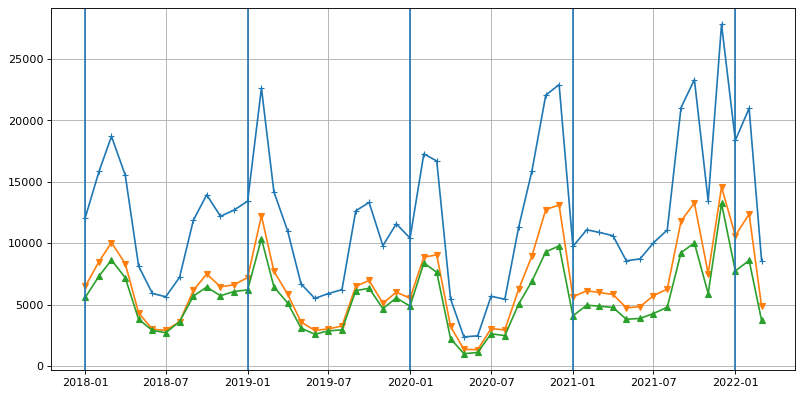

In [320]:
import datetime as dt
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(top_mkb.groupby('month_year').sum('PATIENT_ID_COUNT'), marker = '+')
plt.plot(top_mkb_f.groupby('month_year').sum('PATIENT_ID_COUNT'), marker = 'v')
plt.plot(top_mkb_m.groupby('month_year').sum('PATIENT_ID_COUNT'), marker = '^')
[plt.axvline([dt.datetime(year, 1, 1)]) for year in range(2018, 2023)]
plt.grid()
plt.show()

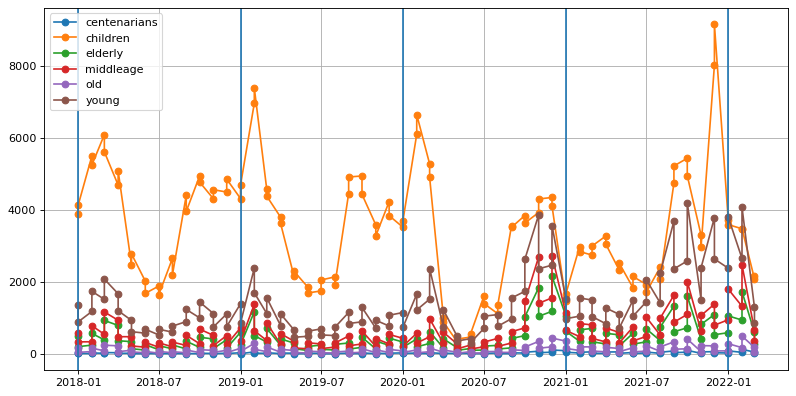

In [321]:
plt.figure(figsize=(12, 6), dpi=80)

top_mkb_by_age = top_mkb.groupby('AGE_CATEGORY').groups.keys()
for age_group in top_mkb_by_age:
    age_group_filtered = top_mkb.query('AGE_CATEGORY == @age_group').sort_values(by='month_year', ascending=True)
    plt.plot(age_group_filtered.loc[:, 'month_year'], age_group_filtered.loc[:, 'PATIENT_ID_COUNT'], marker = 'o')

[plt.axvline([dt.datetime(year, 1, 1)]) for year in range(2018, 2023)]
plt.legend(list(top_mkb_by_age))
plt.grid()
plt.show()

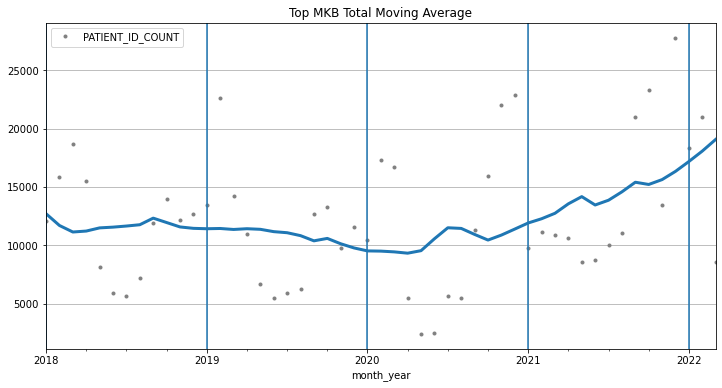

In [351]:
# Moving Average
top_mkb_total = top_mkb.groupby('month_year').sum('PATIENT_ID_COUNT')
#print(top_mkb_total)
moving_average = top_mkb_total.rolling(
    window=12,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=6,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = top_mkb_total.plot(figsize=(12, 6), style=".", color="0.5", grid=True)

moving_average.plot(
    ax=ax, linewidth=3, title="Top MKB Total Moving Average", legend=False,
);
[plt.axvline([dt.datetime(year, 1, 1)]) for year in range(2018, 2023)]
plt.grid()
plt.show()

In [364]:
import datetime as dt

# Coranavirus turning trend point at 2020-05-01
corona_turn = dt.datetime(2020, 5, 1)
corona_turn_idx = top_mkb_total[:corona_turn].shape[0]

In [377]:
top_mkb_total.index[0:corona_turn_idx]

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01'],
              dtype='datetime64[ns]', name='month_year', freq=None)

In [395]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp_prior = DeterministicProcess(
    index=top_mkb_total.index[:corona_turn_idx],  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

dp_after = DeterministicProcess(
    index=top_mkb_total.index[corona_turn_idx-1:],  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

# `in_sample` creates features for the dates given in the `index` argument
X_prior = dp_prior.in_sample()
X_after = dp_after.in_sample()

print(X_prior.tail())
print(X_after.head())

            const  trend
month_year              
2020-01-01    1.0   25.0
2020-02-01    1.0   26.0
2020-03-01    1.0   27.0
2020-04-01    1.0   28.0
2020-05-01    1.0   29.0
            const  trend
month_year              
2020-05-01    1.0    1.0
2020-06-01    1.0    2.0
2020-07-01    1.0    3.0
2020-08-01    1.0    4.0
2020-09-01    1.0    5.0


In [752]:
dp_after.out_of_sample(1)

const  trend
24    1.0   24.0

In [426]:
from sklearn.linear_model import LinearRegression

y_prior = top_mkb_total['PATIENT_ID_COUNT'][:corona_turn_idx]  # the target
y_after = top_mkb_total['PATIENT_ID_COUNT'][corona_turn_idx-1:]  # the target


# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model_prior = LinearRegression(fit_intercept=False)
model_prior.fit(X_prior, y_prior)

model_after = LinearRegression(fit_intercept=False)
model_after.fit(X_after, y_after)

y_pred_prior = pd.Series(model_prior.predict(X_prior), index=X_prior.index)
y_pred_after = pd.Series(model_after.predict(X_after), index=X_after.index)

y_pred_total = pd.concat([y_pred_prior, y_pred_after], axis=0)

print(y_pred_total.reset_index(drop=True).tail())

47    16937.640316
48    17478.371542
49    18019.102767
50    18559.833992
51    19100.565217
dtype: float64


In [413]:
X_prior.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01'],
              dtype='datetime64[ns]', name='month_year', freq=None)

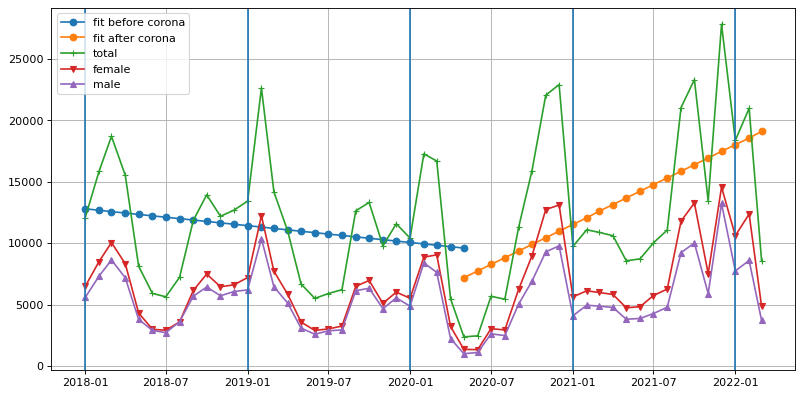

In [408]:
plt.figure(figsize=(12, 6), dpi=80)

plt.plot(X_prior.index, y_pred_prior, marker = 'o')
plt.plot(X_after.index, y_pred_after, marker = 'o')

plt.plot(top_mkb.groupby('month_year').sum('PATIENT_ID_COUNT'), marker = '+')
plt.plot(top_mkb_f.groupby('month_year').sum('PATIENT_ID_COUNT'), marker = 'v')
plt.plot(top_mkb_m.groupby('month_year').sum('PATIENT_ID_COUNT'), marker = '^')

[plt.axvline([dt.datetime(year, 1, 1)]) for year in range(2018, 2023)]

plt.legend(['fit before corona', 'fit after corona', 'total', 'female', 'male'])

plt.grid()
plt.show()

In [799]:
import rsnd

In [810]:
fft_ = rsnd.fft_angle(top_mkb.groupby('month_year').sum('PATIENT_ID_COUNT'), 1)

In [811]:
fft_

{'frequency': array([0.        , 0.01960784, 0.03921569, 0.05882353, 0.07843137,
        0.09803922, 0.11764706, 0.1372549 , 0.15686275, 0.17647059,
        0.19607843, 0.21568627, 0.23529412, 0.25490196, 0.2745098 ,
        0.29411765, 0.31372549, 0.33333333, 0.35294118, 0.37254902,
        0.39215686, 0.41176471, 0.43137255, 0.45098039, 0.47058824]),
 'fft_amplitude': array([[236.96078431],
        [621.37254902],
        [733.45098039],
        [609.29411765],
        [319.45098039],
        [232.2745098 ],
        [221.64705882],
        [283.60784314],
        [465.64705882],
        [546.74509804],
        [478.31372549],
        [497.80392157],
        [526.58823529],
        [887.29411765],
        [556.54901961],
        [431.29411765],
        [262.62745098],
        [216.31372549],
        [231.76470588],
        [244.31372549],
        [495.80392157],
        [522.43137255],
        [384.31372549],
        [454.43137255],
        [408.62745098]])}

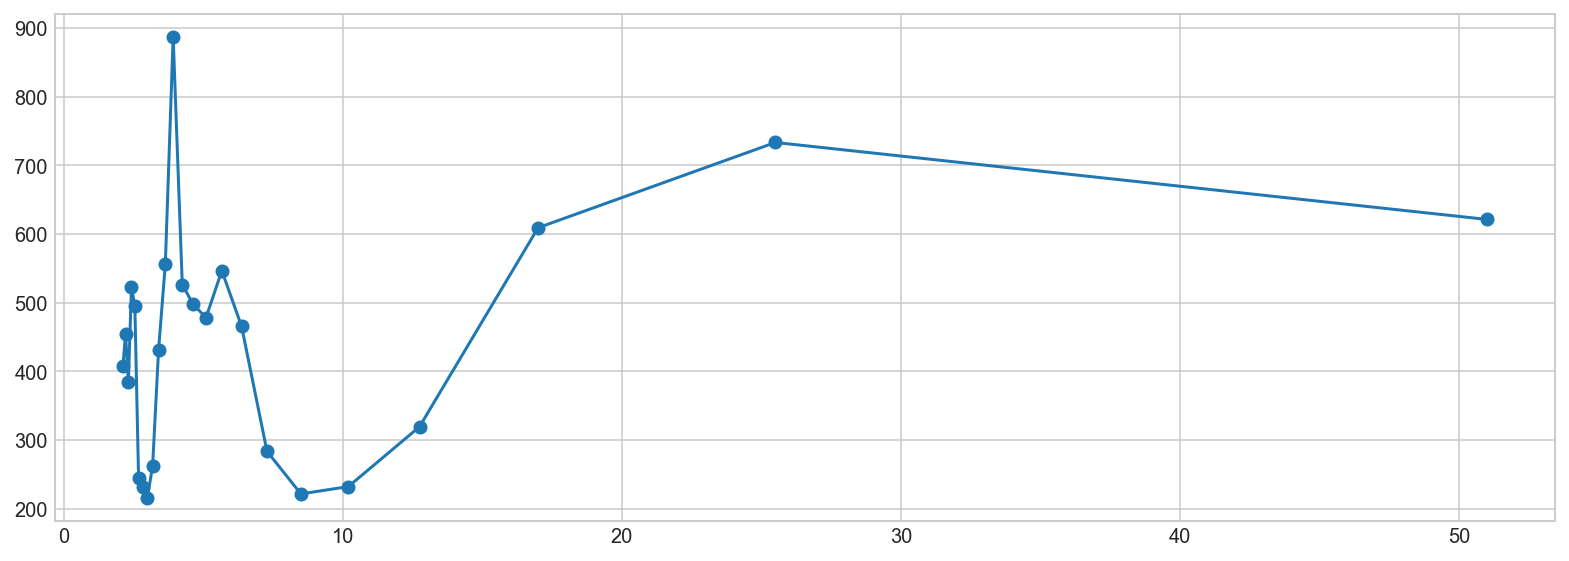

In [813]:
plt.plot(1/fft_['frequency'], fft_['fft_amplitude'], marker='o')
plt.show()

In [814]:
1/fft_['frequency']

array([        inf, 51.        , 25.5       , 17.        , 12.75      ,
       10.2       ,  8.5       ,  7.28571429,  6.375     ,  5.66666667,
        5.1       ,  4.63636364,  4.25      ,  3.92307692,  3.64285714,
        3.4       ,  3.1875    ,  3.        ,  2.83333333,  2.68421053,
        2.55      ,  2.42857143,  2.31818182,  2.2173913 ,  2.125     ])

In [832]:
1/fft_['frequency'][11]

4.636363636363636

In [837]:
fft_['fft_amplitude']

array([[236.96078431],
       [621.37254902],
       [733.45098039],
       [609.29411765],
       [319.45098039],
       [232.2745098 ],
       [221.64705882],
       [283.60784314],
       [465.64705882],
       [546.74509804],
       [478.31372549],
       [497.80392157],
       [526.58823529],
       [887.29411765],
       [556.54901961],
       [431.29411765],
       [262.62745098],
       [216.31372549],
       [231.76470588],
       [244.31372549],
       [495.80392157],
       [522.43137255],
       [384.31372549],
       [454.43137255],
       [408.62745098]])

In [838]:
# @link https://stackoverflow.com/questions/27516849/how-to-convert-list-of-numpy-arrays-into-single-numpy-array
np.concatenate(fft_['fft_amplitude'], axis=0)

array([236.96078431, 621.37254902, 733.45098039, 609.29411765,
       319.45098039, 232.2745098 , 221.64705882, 283.60784314,
       465.64705882, 546.74509804, 478.31372549, 497.80392157,
       526.58823529, 887.29411765, 556.54901961, 431.29411765,
       262.62745098, 216.31372549, 231.76470588, 244.31372549,
       495.80392157, 522.43137255, 384.31372549, 454.43137255,
       408.62745098])

In [842]:
np.stack(fft_['fft_amplitude'], axis=0)
np.vstack(fft_['fft_amplitude'])
np.array(fft_['fft_amplitude'])

array([[236.96078431],
       [621.37254902],
       [733.45098039],
       [609.29411765],
       [319.45098039],
       [232.2745098 ],
       [221.64705882],
       [283.60784314],
       [465.64705882],
       [546.74509804],
       [478.31372549],
       [497.80392157],
       [526.58823529],
       [887.29411765],
       [556.54901961],
       [431.29411765],
       [262.62745098],
       [216.31372549],
       [231.76470588],
       [244.31372549],
       [495.80392157],
       [522.43137255],
       [384.31372549],
       [454.43137255],
       [408.62745098]])

In [848]:
s1 = pd.Series(1/fft_['frequency'])

In [849]:
s2 = pd.Series(np.concatenate(fft_['fft_amplitude'], axis=0))

In [855]:
f=pd.concat([s1, s2], axis = 1, names=['Period, month', 'Amplitude'])

Раз в 3 месяца пик самый большой.

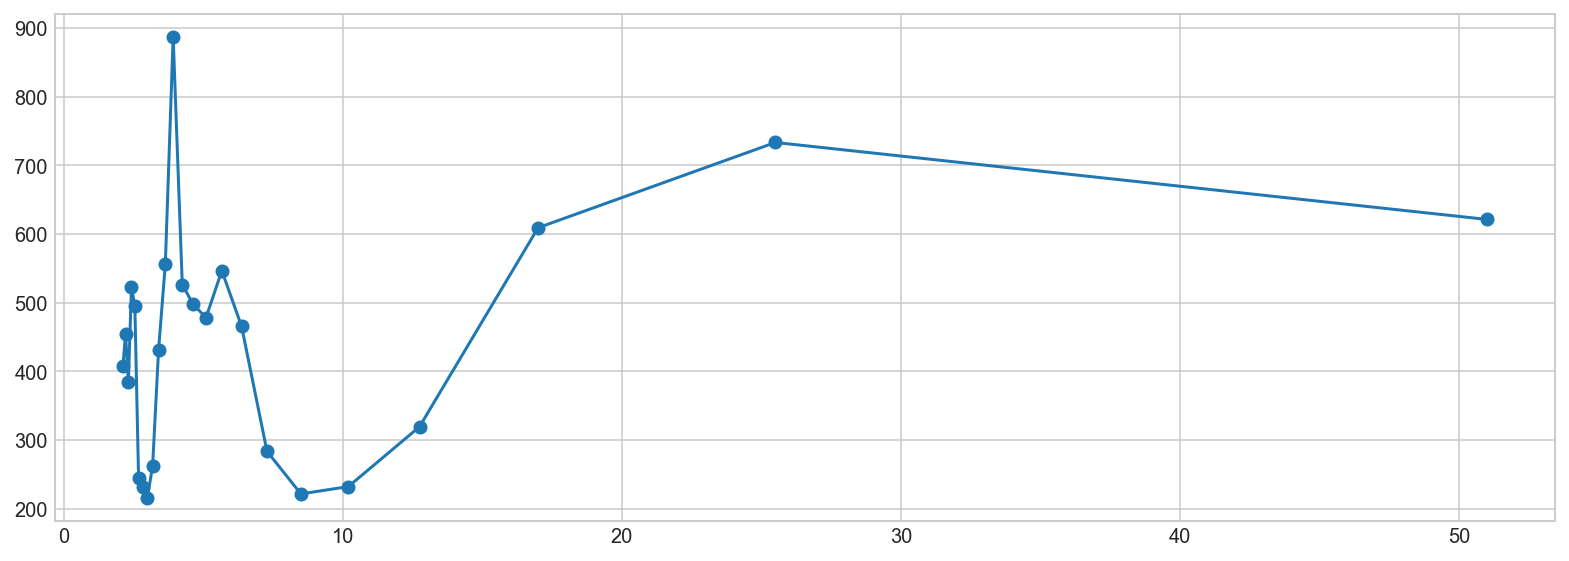

In [858]:
plt.plot(f[0], f[1], marker='o')
plt.show()

In [453]:
y_p_t = pd.DataFrame(y_pred_total)

In [454]:
y_p_t.rename(columns={0: 'PATIENT_ID_COUNT'}, inplace=True)
y_p_t

PATIENT_ID_COUNT
month_year                  
2018-01-01      12805.462069
2018-02-01      12691.392118
2018-03-01      12577.322167
2018-04-01      12463.252217
2018-05-01      12349.182266
2018-06-01      12235.112315
2018-07-01      12121.042365
2018-08-01      12006.972414
2018-09-01      11892.902463
2018-10-01      11778.832512
2018-11-01      11664.762562
2018-12-01      11550.692611
2019-01-01      11436.622660
2019-02-01      11322.552709
2019-03-01      11208.482759
2019-04-01      11094.412808
2019-05-01      10980.342857
2019-06-01      10866.272906
2019-07-01      10752.202956
2019-08-01      10638.133005
2019-09-01      10524.063054
2019-10-01      10409.993103
2019-11-01      10295.923153
2019-12-01      10181.853202
2020-01-01      10067.783251
2020-02-01       9953.713300
2020-03-01       9839.643350
2020-04-01       9725.573399
2020-05-01       9611.503448
2020-05-01       7204.478261
2020-06-01       7745.209486
2020-07-01       8285.940711
2020-08-01       8826.671937
2020-09-01       9367.403162
2020-10-01       9908.134387
2020-11-01      10448.865613
2020-12-01      10989.596838
2021-01-01      11530.328063
2021-02-01      12071.059289
2021-03-01      12611.790514
2021-04-01      13152.521739
2021-05-01      13693.252964
2021-06-01      14233.984190
2021-07-01      14774.715415
2021-08-01      15315.446640
2021-09-01      15856.177866
2021-10-01      16396.909091
2021-11-01      16937.640316
2021-12-01      17478.371542
2022-01-01      18019.102767
2022-02-01      18559.833992
2022-03-01      19100.565217

In [456]:
top_mkb.groupby('month_year').sum('PATIENT_ID_COUNT') - y_p_t

PATIENT_ID_COUNT
month_year                  
2018-01-01       -720.462069
2018-02-01       3153.607882
2018-03-01       6125.677833
2018-04-01       3073.747783
2018-05-01      -4203.182266
2018-06-01      -6312.112315
2018-07-01      -6469.042365
2018-08-01      -4774.972414
2018-09-01        -18.902463
2018-10-01       2163.167488
2018-11-01        532.237438
2018-12-01       1143.307389
2019-01-01       1991.377340
2019-02-01      11303.447291
2019-03-01       2983.517241
2019-04-01        -96.412808
2019-05-01      -4283.342857
2019-06-01      -5350.272906
2019-07-01      -4842.202956
2019-08-01      -4408.133005
2019-09-01       2118.936946
2019-10-01       2912.006897
2019-11-01       -495.923153
2019-12-01       1406.146798
2020-01-01        352.216749
2020-02-01       7325.286700
2020-03-01       6853.356650
2020-04-01      -4239.573399
2020-05-01      -7223.503448
2020-05-01      -4816.478261
2020-06-01      -5271.209486
2020-07-01      -2594.940711
2020-08-01      -3375.671937
2020-09-01       1934.596838
2020-10-01       5997.865613
2020-11-01      11603.134387
2020-12-01      11916.403162
2021-01-01      -1784.328063
2021-02-01       -970.059289
2021-03-01      -1721.790514
2021-04-01      -2534.521739
2021-05-01      -5117.252964
2021-06-01      -5499.984190
2021-07-01      -4734.715415
2021-08-01      -4236.446640
2021-09-01       5188.822134
2021-10-01       6913.090909
2021-11-01      -3496.640316
2021-12-01      10336.628458
2022-01-01        352.897233
2022-02-01       2422.166008
2022-03-01     -10511.565217

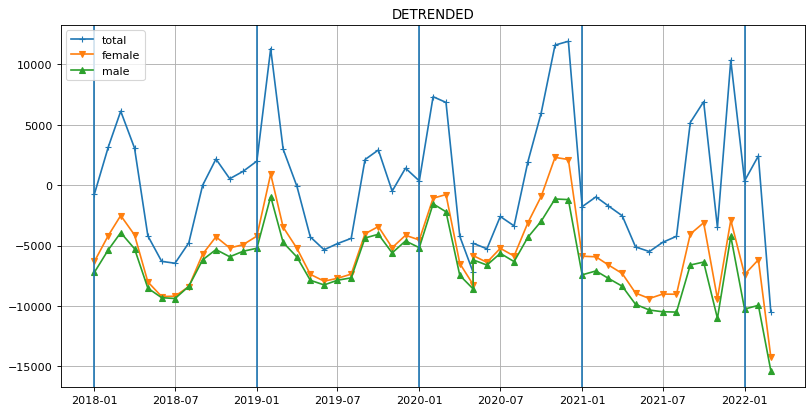

In [458]:
plt.figure(figsize=(12, 6), dpi=80)

plt.plot(top_mkb.groupby('month_year').sum('PATIENT_ID_COUNT') - y_p_t, marker = '+')
plt.plot(top_mkb_f.groupby('month_year').sum('PATIENT_ID_COUNT') - y_p_t, marker = 'v')
plt.plot(top_mkb_m.groupby('month_year').sum('PATIENT_ID_COUNT') - y_p_t, marker = '^')

[plt.axvline([dt.datetime(year, 1, 1)]) for year in range(2018, 2023)]

plt.title('DETRENDED')

plt.legend(['total', 'female', 'male'])

plt.grid()
plt.show()

In [682]:
# @link https://www.kaggle.com/code/ryanholbrook/hybrid-models/tutorial

In [684]:
y_detrend = top_mkb.groupby('month_year').sum('PATIENT_ID_COUNT') - y_p_t
y_detrend

PATIENT_ID_COUNT
month_year                  
2018-01-01       -720.462069
2018-02-01       3153.607882
2018-03-01       6125.677833
2018-04-01       3073.747783
2018-05-01      -4203.182266
2018-06-01      -6312.112315
2018-07-01      -6469.042365
2018-08-01      -4774.972414
2018-09-01        -18.902463
2018-10-01       2163.167488
2018-11-01        532.237438
2018-12-01       1143.307389
2019-01-01       1991.377340
2019-02-01      11303.447291
2019-03-01       2983.517241
2019-04-01        -96.412808
2019-05-01      -4283.342857
2019-06-01      -5350.272906
2019-07-01      -4842.202956
2019-08-01      -4408.133005
2019-09-01       2118.936946
2019-10-01       2912.006897
2019-11-01       -495.923153
2019-12-01       1406.146798
2020-01-01        352.216749
2020-02-01       7325.286700
2020-03-01       6853.356650
2020-04-01      -4239.573399
2020-05-01      -7223.503448
2020-05-01      -4816.478261
2020-06-01      -5271.209486
2020-07-01      -2594.940711
2020-08-01      -3375.671937
2020-09-01       1934.596838
2020-10-01       5997.865613
2020-11-01      11603.134387
2020-12-01      11916.403162
2021-01-01      -1784.328063
2021-02-01       -970.059289
2021-03-01      -1721.790514
2021-04-01      -2534.521739
2021-05-01      -5117.252964
2021-06-01      -5499.984190
2021-07-01      -4734.715415
2021-08-01      -4236.446640
2021-09-01       5188.822134
2021-10-01       6913.090909
2021-11-01      -3496.640316
2021-12-01      10336.628458
2022-01-01        352.897233
2022-02-01       2422.166008
2022-03-01     -10511.565217

In [687]:
from scipy import integrate

#y_detrend.apply(lambda g: integrate.trapz(g.PATIENT_ID_COUNT, x=g.month_year))

In [694]:
y_detrend[:52].sum()

PATIENT_ID_COUNT    3.637979e-11
dtype: float64

In [695]:
y_p_t

PATIENT_ID_COUNT
month_year                  
2018-01-01      12805.462069
2018-02-01      12691.392118
2018-03-01      12577.322167
2018-04-01      12463.252217
2018-05-01      12349.182266
2018-06-01      12235.112315
2018-07-01      12121.042365
2018-08-01      12006.972414
2018-09-01      11892.902463
2018-10-01      11778.832512
2018-11-01      11664.762562
2018-12-01      11550.692611
2019-01-01      11436.622660
2019-02-01      11322.552709
2019-03-01      11208.482759
2019-04-01      11094.412808
2019-05-01      10980.342857
2019-06-01      10866.272906
2019-07-01      10752.202956
2019-08-01      10638.133005
2019-09-01      10524.063054
2019-10-01      10409.993103
2019-11-01      10295.923153
2019-12-01      10181.853202
2020-01-01      10067.783251
2020-02-01       9953.713300
2020-03-01       9839.643350
2020-04-01       9725.573399
2020-05-01       9611.503448
2020-05-01       7204.478261
2020-06-01       7745.209486
2020-07-01       8285.940711
2020-08-01       8826.671937
2020-09-01       9367.403162
2020-10-01       9908.134387
2020-11-01      10448.865613
2020-12-01      10989.596838
2021-01-01      11530.328063
2021-02-01      12071.059289
2021-03-01      12611.790514
2021-04-01      13152.521739
2021-05-01      13693.252964
2021-06-01      14233.984190
2021-07-01      14774.715415
2021-08-01      15315.446640
2021-09-01      15856.177866
2021-10-01      16396.909091
2021-11-01      16937.640316
2021-12-01      17478.371542
2022-01-01      18019.102767
2022-02-01      18559.833992
2022-03-01      19100.565217

In [719]:
#model_after.predict(X)
#y_pred_after = pd.Series(model_after.predict(X_after), index=X_after.index)
X_after
X_after.index[-1:]
d = {'a': 1, 'b': 2, 'c': 3}
da = {dt.datetime(2022,4,1): 0}
ser = pd.Series(da, name='for pred')
#ser = pd.Series(data=d, index=['a', 'b', 'c'])
ser

2022-04-01    0
Name: for pred, dtype: int64

In [704]:
X

y_lag_1
month_year         
2018-01         0.0
2018-02     12085.0
2018-03     15845.0
2018-04     18703.0
2018-05     15537.0
2018-06      8146.0
2018-07      5923.0
2018-08      5652.0
2018-09      7232.0
2018-10     11874.0
2018-11     13942.0
2018-12     12197.0
2019-01     12694.0
2019-02     13428.0
2019-03     22626.0
2019-04     14192.0
2019-05     10998.0
2019-06      6697.0
2019-07      5516.0
2019-08      5910.0
2019-09      6230.0
2019-10     12643.0
2019-11     13322.0
2019-12      9800.0
2020-01     11588.0
2020-02     10420.0
2020-03     17279.0
2020-04     16693.0
2020-05      5486.0
2020-06      2388.0
2020-07      2474.0
2020-08      5691.0
2020-09      5451.0
2020-10     11302.0
2020-11     15906.0
2020-12     22052.0
2021-01     22906.0
2021-02      9746.0
2021-03     11101.0
2021-04     10890.0
2021-05     10618.0
2021-06      8576.0
2021-07      8734.0
2021-08     10040.0
2021-09     11079.0
2021-10     21045.0
2021-11     23310.0
2021-12     13441.0
2022-01     27815.0
2022-02     18372.0
2022-03     20982.0

In [721]:
!pip install xgboost

In [722]:
from xgboost import XGBRegressor

In [725]:
# Pivot wide to long (stack) and convert DataFrame to Series (squeeze)
#y_fit = y_fit.stack().squeeze()    # trend from training set
#y_pred = y_pred.stack().squeeze()  # trend from test set

# Create residuals (the collection of detrended series) from the training set
#y_resid = y_train - y_fit

# Train XGBoost on the residuals
xgb = XGBRegressor()
xgb.fit(X_after, y_detrend[corona_turn_idx:])

# Add the predicted residuals onto the predicted trends
#y_fit_boosted = xgb.predict(X_train) + y_fit
#y_pred_boosted = xgb.predict(X_test) + y_pred

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [787]:
X_after

const  trend
month_year              
2020-05-01    1.0    1.0
2020-06-01    1.0    2.0
2020-07-01    1.0    3.0
2020-08-01    1.0    4.0
2020-09-01    1.0    5.0
2020-10-01    1.0    6.0
2020-11-01    1.0    7.0
2020-12-01    1.0    8.0
2021-01-01    1.0    9.0
2021-02-01    1.0   10.0
2021-03-01    1.0   11.0
2021-04-01    1.0   12.0
2021-05-01    1.0   13.0
2021-06-01    1.0   14.0
2021-07-01    1.0   15.0
2021-08-01    1.0   16.0
2021-09-01    1.0   17.0
2021-10-01    1.0   18.0
2021-11-01    1.0   19.0
2021-12-01    1.0   20.0
2022-01-01    1.0   21.0
2022-02-01    1.0   22.0
2022-03-01    1.0   23.0

In [788]:
xgb_sh_1 = XGBRegressor()
xgb_sh_1.fit(X_after[:-1], y_detrend.iloc[corona_turn_idx:-1])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [792]:
X_after[-1:]

const  trend
month_year              
2022-03-01    1.0   23.0

In [794]:
y_p_t[-1:]

PATIENT_ID_COUNT
month_year                  
2022-03-01      19100.565217

In [798]:
xgb_sh_1.predict(X_after[-1:])

array([2422.165], dtype=float32)

In [797]:
y_p_t[-1:]

PATIENT_ID_COUNT
month_year                  
2022-03-01      19100.565217

In [795]:
xgb_sh_1.predict(X_after[-1:]) + y_p_t[-1:]

PATIENT_ID_COUNT
month_year                  
2022-03-01      21522.730256

In [737]:
X_test = pd.DataFrame(data = {'PATIENT_ID_COUNT': [0]}, index=[dt.datetime(2022,4,1)])
X_test

PATIENT_ID_COUNT
2022-04-01                 0

In [753]:
xgb.predict(dp_after.out_of_sample(1))

array([-10511.369], dtype=float32)

In [755]:
# @ 2022-04-01
xgb.predict(dp_after.out_of_sample(1))+model_after.predict(dp_after.out_of_sample(1))

array([9129.92730206])

In [739]:
X_test.index

DatetimeIndex(['2022-04-01'], dtype='datetime64[ns]', freq=None)

In [751]:
X_after

const  trend
month_year              
2020-05-01    1.0    1.0
2020-06-01    1.0    2.0
2020-07-01    1.0    3.0
2020-08-01    1.0    4.0
2020-09-01    1.0    5.0
2020-10-01    1.0    6.0
2020-11-01    1.0    7.0
2020-12-01    1.0    8.0
2021-01-01    1.0    9.0
2021-02-01    1.0   10.0
2021-03-01    1.0   11.0
2021-04-01    1.0   12.0
2021-05-01    1.0   13.0
2021-06-01    1.0   14.0
2021-07-01    1.0   15.0
2021-08-01    1.0   16.0
2021-09-01    1.0   17.0
2021-10-01    1.0   18.0
2021-11-01    1.0   19.0
2021-12-01    1.0   20.0
2022-01-01    1.0   21.0
2022-02-01    1.0   22.0
2022-03-01    1.0   23.0

In [ ]:
# Add the predicted residuals onto the predicted trends
y_fit_boosted = xgb.predict(X_train) + y_fit
y_pred_boosted = xgb.predict(X_test) + y_pred

In [ ]:
# source: https://www.kaggle.com/code/ryanholbrook/seasonality/tutorial

In [496]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta(np.timedelta64(1, "M"))
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    #ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticks([1, 2, 4, 6])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            #"Monthly (12)",
            #"Biweekly (26)",
            #"Weekly (52)",
            #"Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


#data_dir = Path("../input/ts-course-data")
#tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])
#tunnel = tunnel.set_index("Day").to_period("D")

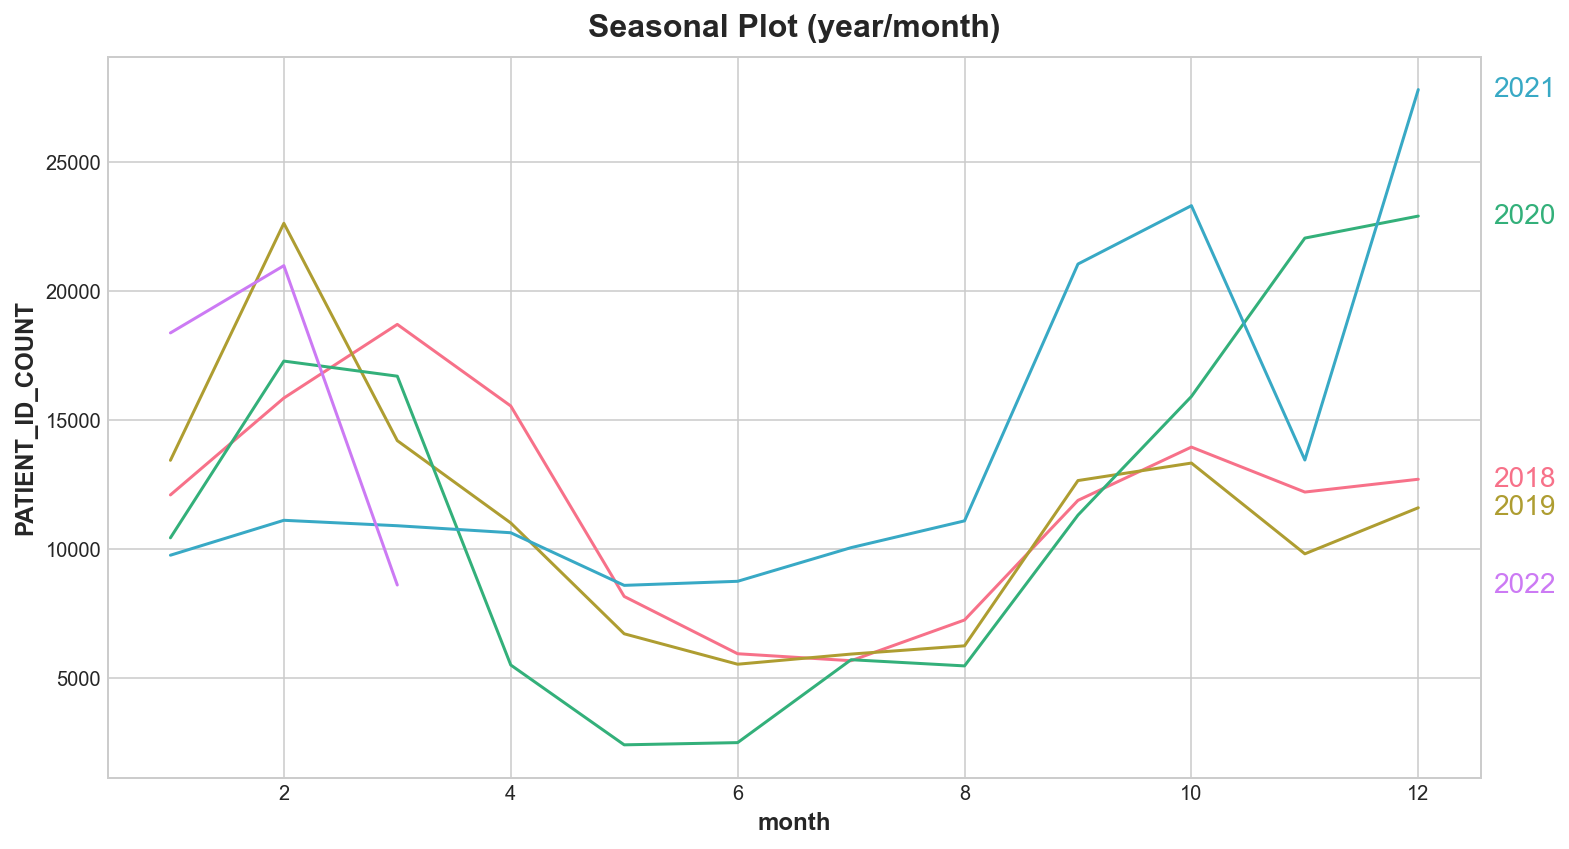

In [472]:
X_n = top_mkb.groupby('month_year').sum('PATIENT_ID_COUNT').copy()

# days within a week
X_n["day"] = X_n.index.dayofweek  # the x-axis (freq)
X_n["week"] = X_n.index.week  # the seasonal period (period)

# days within a year
X_n["month"] = X_n.index.month
X_n["year"] = X_n.index.year

fig, ax0 = plt.subplots(1, 1, figsize=(11, 6))

#seasonal_plot(X_n, y="PATIENT_ID_COUNT", period="week", freq="day", ax=ax0)
#seasonal_plot(X_n, y="PATIENT_ID_COUNT", period="year", freq="month", ax=ax1);
seasonal_plot(X_n, y="PATIENT_ID_COUNT", period="year", freq="month", ax=ax0);

In [474]:
X_n.head()

PATIENT_ID_COUNT  day  week  month  year
month_year                                          
2018-01-01             12085    0     1      1  2018
2018-02-01             15845    3     5      2  2018
2018-03-01             18703    3     9      3  2018
2018-04-01             15537    6    13      4  2018
2018-05-01              8146    1    18      5  2018

In [478]:
type(X_n.PATIENT_ID_COUNT.head())

pandas.core.series.Series

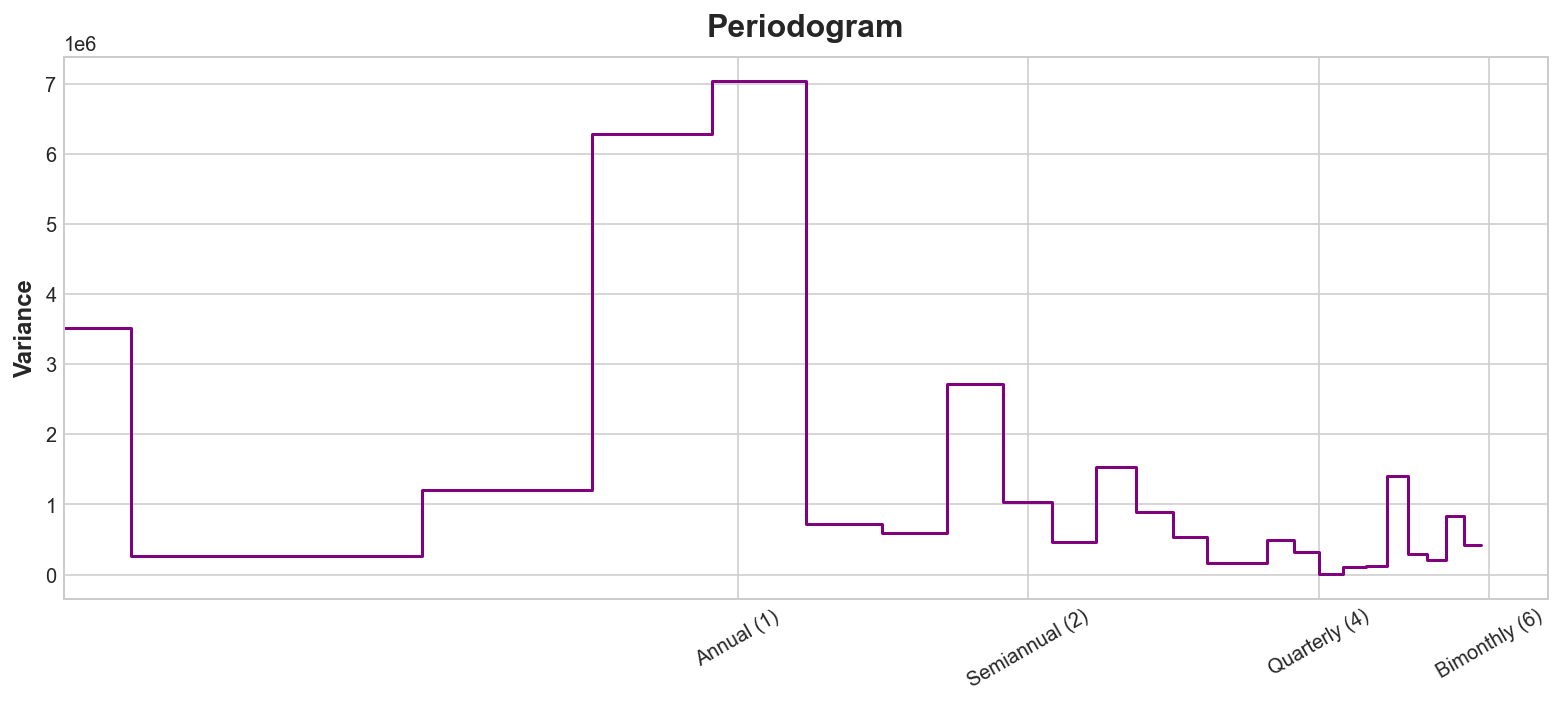

In [497]:
plot_periodogram(X_n.PATIENT_ID_COUNT);

In [517]:
pd.DatetimeIndex(X_n.index)

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='month_year', freq=None)

In [518]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=4)  # 10 sin/cos pairs for "A"nnual seasonality

dp_s = DeterministicProcess(
    #index=X_n.index,
    index=pd.DatetimeIndex(X_n.index),
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X_s = dp_s.in_sample()  # create features for dates in tunnel.index

In [519]:
X_s

const  trend  s(2,12)  s(3,12)  s(4,12)  s(5,12)  s(6,12)  \
month_year                                                              
2018-01-01    1.0    1.0      0.0      0.0      0.0      0.0      0.0   
2018-02-01    1.0    2.0      1.0      0.0      0.0      0.0      0.0   
2018-03-01    1.0    3.0      0.0      1.0      0.0      0.0      0.0   
2018-04-01    1.0    4.0      0.0      0.0      1.0      0.0      0.0   
2018-05-01    1.0    5.0      0.0      0.0      0.0      1.0      0.0   
2018-06-01    1.0    6.0      0.0      0.0      0.0      0.0      1.0   
2018-07-01    1.0    7.0      0.0      0.0      0.0      0.0      0.0   
2018-08-01    1.0    8.0      0.0      0.0      0.0      0.0      0.0   
2018-09-01    1.0    9.0      0.0      0.0      0.0      0.0      0.0   
2018-10-01    1.0   10.0      0.0      0.0      0.0      0.0      0.0   
2018-11-01    1.0   11.0      0.0      0.0      0.0      0.0      0.0   
2018-12-01    1.0   12.0      0.0      0.0      0.0      0.0      0.0   
2019-01-01    1.0   13.0      0.0      0.0      0.0      0.0      0.0   
2019-02-01    1.0   14.0      1.0      0.0      0.0      0.0      0.0   
2019-03-01    1.0   15.0      0.0      1.0      0.0      0.0      0.0   
2019-04-01    1.0   16.0      0.0      0.0      1.0      0.0      0.0   
2019-05-01    1.0   17.0      0.0      0.0      0.0      1.0      0.0   
2019-06-01    1.0   18.0      0.0      0.0      0.0      0.0      1.0   
2019-07-01    1.0   19.0      0.0      0.0      0.0      0.0      0.0   
2019-08-01    1.0   20.0      0.0      0.0      0.0      0.0      0.0   
2019-09-01    1.0   21.0      0.0      0.0      0.0      0.0      0.0   
2019-10-01    1.0   22.0      0.0      0.0      0.0      0.0      0.0   
2019-11-01    1.0   23.0      0.0      0.0      0.0      0.0      0.0   
2019-12-01    1.0   24.0      0.0      0.0      0.0      0.0      0.0   
2020-01-01    1.0   25.0      0.0      0.0      0.0      0.0      0.0   
2020-02-01    1.0   26.0      1.0      0.0      0.0      0.0      0.0   
2020-03-01    1.0   27.0      0.0      1.0      0.0      0.0      0.0   
2020-04-01    1.0   28.0      0.0      0.0      1.0      0.0      0.0   
2020-05-01    1.0   29.0      0.0      0.0      0.0      1.0      0.0   
2020-06-01    1.0   30.0      0.0      0.0      0.0      0.0      1.0   
2020-07-01    1.0   31.0      0.0      0.0      0.0      0.0      0.0   
2020-08-01    1.0   32.0      0.0      0.0      0.0      0.0      0.0   
2020-09-01    1.0   33.0      0.0      0.0      0.0      0.0      0.0   
2020-10-01    1.0   34.0      0.0      0.0      0.0      0.0      0.0   
2020-11-01    1.0   35.0      0.0      0.0      0.0      0.0      0.0   
2020-12-01    1.0   36.0      0.0      0.0      0.0      0.0      0.0   
2021-01-01    1.0   37.0      0.0      0.0      0.0      0.0      0.0   
2021-02-01    1.0   38.0      1.0      0.0      0.0      0.0      0.0   
2021-03-01    1.0   39.0      0.0      1.0      0.0      0.0      0.0   
2021-04-01    1.0   40.0      0.0      0.0      1.0      0.0      0.0   
2021-05-01    1.0   41.0      0.0      0.0      0.0      1.0      0.0   
2021-06-01    1.0   42.0      0.0      0.0      0.0      0.0      1.0   
2021-07-01    1.0   43.0      0.0      0.0      0.0      0.0      0.0   
2021-08-01    1.0   44.0      0.0      0.0      0.0      0.0      0.0   
2021-09-01    1.0   45.0      0.0      0.0      0.0      0.0      0.0   
2021-10-01    1.0   46.0      0.0      0.0      0.0      0.0      0.0   
2021-11-01    1.0   47.0      0.0      0.0      0.0      0.0      0.0   
2021-12-01    1.0   48.0      0.0      0.0      0.0      0.0      0.0   
2022-01-01    1.0   49.0      0.0      0.0      0.0      0.0      0.0   
2022-02-01    1.0   50.0      1.0      0.0      0.0      0.0      0.0   
2022-03-01    1.0   51.0      0.0      1.0      0.0      0.0      0.0   

            s(7,12)  s(8,12)  s(9,12)  ...  s(11,12)  s(12,12)  \
month_year                             ...                       
2018-01-01

In [ ]:
dp_s.out_of_sample(steps=51,forecast_index=X_n.index)

In [537]:
X_n.index+51*np.timedelta64(1, 'M')

DatetimeIndex(['2022-04-02 06:44:06', '2022-05-03 06:44:06',
               '2022-05-31 06:44:06', '2022-07-01 06:44:06',
               '2022-07-31 06:44:06', '2022-08-31 06:44:06',
               '2022-09-30 06:44:06', '2022-10-31 06:44:06',
               '2022-12-01 06:44:06', '2022-12-31 06:44:06',
               '2023-01-31 06:44:06', '2023-03-02 06:44:06',
               '2023-04-02 06:44:06', '2023-05-03 06:44:06',
               '2023-05-31 06:44:06', '2023-07-01 06:44:06',
               '2023-07-31 06:44:06', '2023-08-31 06:44:06',
               '2023-09-30 06:44:06', '2023-10-31 06:44:06',
               '2023-12-01 06:44:06', '2023-12-31 06:44:06',
               '2024-01-31 06:44:06', '2024-03-01 06:44:06',
               '2024-04-01 06:44:06', '2024-05-02 06:44:06',
               '2024-05-31 06:44:06', '2024-07-01 06:44:06',
               '2024-07-31 06:44:06', '2024-08-31 06:44:06',
               '2024-09-30 06:44:06', '2024-10-31 06:44:06',
               '2024-12-

In [548]:
pd.date_range(start='2022-04-01', end='2026-07-01', freq='M').shape

(51,)

In [553]:
X_n['PATIENT_ID_COUNT'].tail()

month_year
2021-11-01    13441
2021-12-01    27815
2022-01-01    18372
2022-02-01    20982
2022-03-01     8589
Name: PATIENT_ID_COUNT, dtype: int32

In [534]:
X_n.index[-1]

Timestamp('2022-03-01 00:00:00')

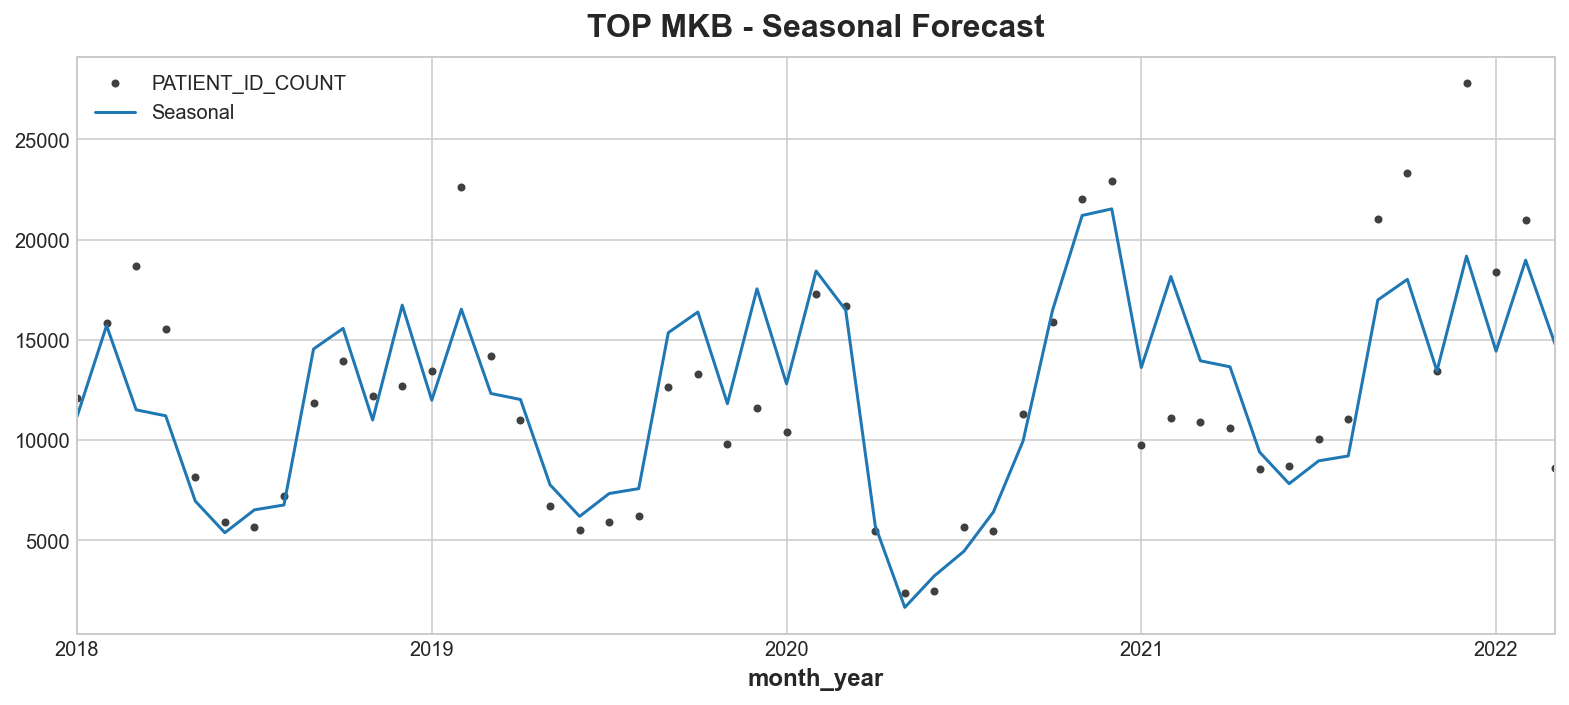

In [550]:
y_s = X_n['PATIENT_ID_COUNT']

model = LinearRegression(fit_intercept=False)
_ = model.fit(X_s, y_s)

y_pred = pd.Series(model.predict(X_s), index=y_s.index)
#X_fore = dp_s.out_of_sample(steps=51, forecast_index=X_n.index+51*np.timedelta64(1, 'M'))
#X_fore = dp_s.out_of_sample(steps=51, forecast_index=pd.date_range(start='2022-04-01', end='2026-07-01', freq='M'))

#y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y_s.plot(color='0.25', style='.', title="TOP MKB - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
#ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
#ax.set_xlim(X_n.index[0], X_n.index[-1])
_ = ax.legend()

In [ ]:
# Correlations https://www.kaggle.com/code/ryanholbrook/time-series-as-features/tutorial

In [556]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


#data_dir = Path("../input/ts-course-data")
#flu_trends = pd.read_csv(data_dir / "flu-trends.csv")
#flu_trends.set_index(
#    pd.PeriodIndex(flu_trends.Week, freq="W"),
#    inplace=True,
#)
#flu_trends.drop("Week", axis=1, inplace=True)

#ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
#_ = ax.set(ylabel="Office Visits")


In [560]:
flu_trends = X_n.copy()
flu_trends.head()

PATIENT_ID_COUNT  day  week  month  year
month_year                                          
2018-01-01             12085    0     1      1  2018
2018-02-01             15845    3     5      2  2018
2018-03-01             18703    3     9      3  2018
2018-04-01             15537    6    13      4  2018
2018-05-01              8146    1    18      5  2018

In [564]:
flu_trends.

Index(['PATIENT_ID_COUNT', 'day', 'week', 'month', 'year'], dtype='object')

In [566]:
flu_trends.set_index(pd.PeriodIndex(flu_trends.index, freq="M"), inplace=True)

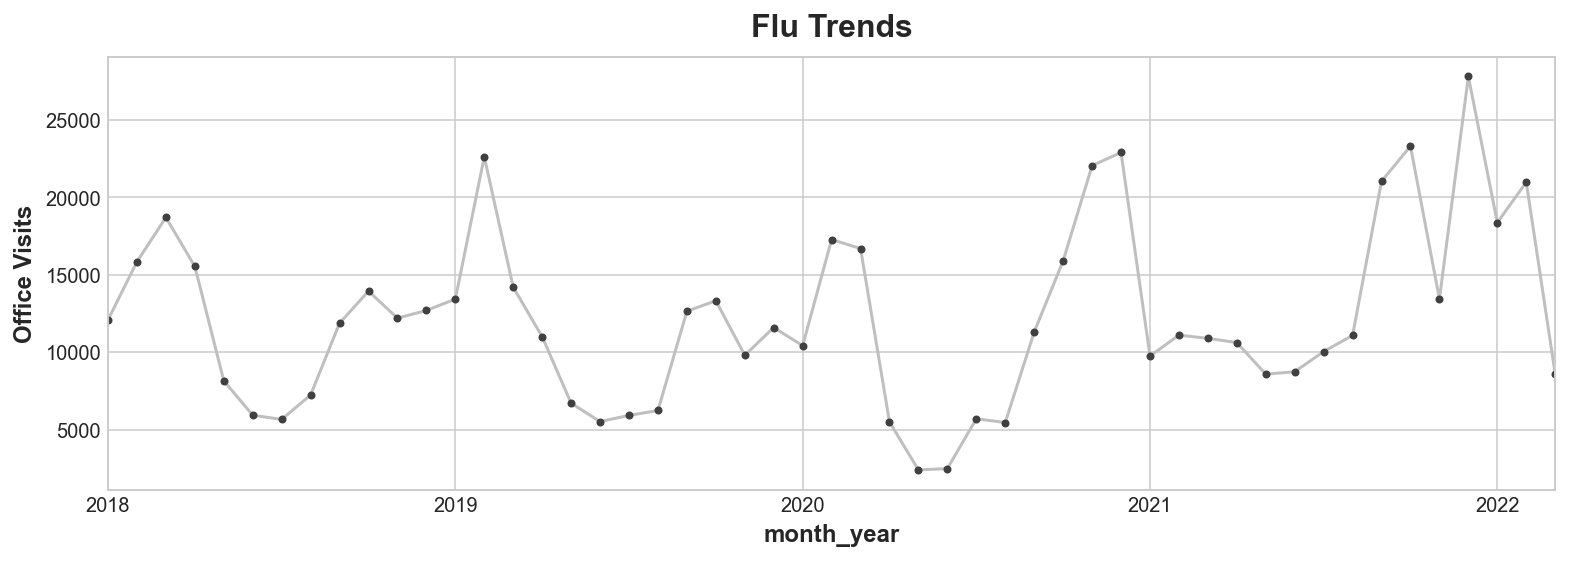

In [568]:
ax = flu_trends.PATIENT_ID_COUNT.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

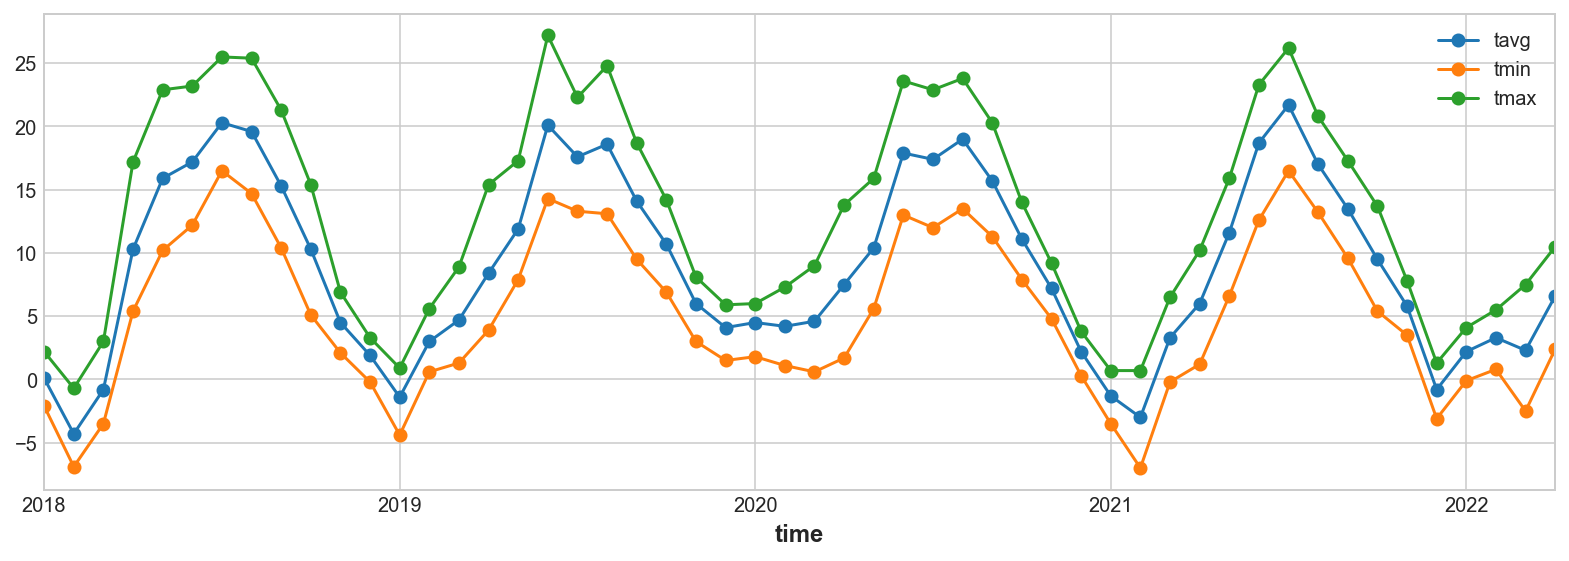

In [581]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Monthly

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2022, 4, 30)

# Create Point for Kaliningrad
location = Point(54.710128, 20.5105838, 0)

# Get daily data for 2018
data = Monthly(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'], marker='o')
plt.show()

In [583]:
flu_trends.shape

(51, 5)

In [588]:
data

tavg  tmin  tmax  prcp  wspd    pres  tsun
time                                                  
2018-01-01   0.1  -2.1   2.2  79.4  13.0     NaN   NaN
2018-02-01  -4.3  -6.9  -0.7  22.1   NaN     NaN   NaN
2018-03-01  -0.8  -3.5   3.0  20.6   NaN     NaN   NaN
2018-04-01  10.3   5.4  17.2  43.7   NaN     NaN   NaN
2018-05-01  15.9  10.2  22.9  35.5  10.5     NaN   NaN
2018-06-01  17.2  12.2  23.2  34.4   NaN     NaN   NaN
2018-07-01  20.3  16.5  25.5  94.2   NaN  1012.7   NaN
2018-08-01  19.6  14.7  25.4  65.9  10.0  1015.7   NaN
2018-09-01  15.3  10.4  21.3  40.0  10.0  1017.8   NaN
2018-10-01  10.3   5.1  15.4  61.6  12.9  1015.8   NaN
2018-11-01   4.5   2.1   6.9  29.5  11.1  1024.6   NaN
2018-12-01   1.9  -0.2   3.3  86.5  12.0  1014.7   NaN
2019-01-01  -1.4  -4.4   0.9  87.4  14.6  1007.5   NaN
2019-02-01   3.0   0.6   5.6  37.2  15.3  1017.8   NaN
2019-03-01   4.7   1.3   8.9  56.5  16.6  1009.8   NaN
2019-04-01   8.4   3.9  15.4   3.5  13.2  1020.8   NaN
2019-05-01  11.9   7.9  17.3  56.9  13.0  1012.5   NaN
2019-06-01  20.1  14.3  27.2  65.7  11.1  1017.5   NaN
2019-07-01  17.6  13.3  22.3  79.0  13.2  1011.6   NaN
2019-08-01  18.6  13.1  24.8   NaN   9.2  1016.4   NaN
2019-09-01  14.1   9.5  18.7   NaN  12.8  1014.5   NaN
2019-10-01  10.7   6.9  14.2   NaN  11.5  1012.6   NaN
2019-11-01   6.0   3.0   8.1   NaN  12.9  1009.5   NaN
2019-12-01   4.1   1.5   5.9  55.2  14.4  1009.5   NaN
2020-01-01   4.5   1.8   6.0   NaN  16.4  1016.5   NaN
2020-02-01   4.2   1.1   7.3  79.5  17.4  1005.7   NaN
2020-03-01   4.6   0.6   9.0  47.5  13.9  1016.9   NaN
2020-04-01   7.5   1.7  13.8   8.7  15.3  1016.4   NaN
2020-05-01  10.4   5.6  15.9  86.7  14.6  1016.2   NaN
2020-06-01  17.9  13.0  23.6  93.2  10.7  1012.5   NaN
2020-07-01  17.4  12.0  22.9   NaN  13.4  1013.5   NaN
2020-08-01  19.0  13.5  23.8   NaN  10.8  1013.8   NaN
2020-09-01  15.7  11.3  20.3   NaN  14.6  1015.3   NaN
2020-10-01  11.1   7.9  14.0   NaN  14.3  1011.5   NaN
2020-11-01   7.2   4.8   9.2   NaN  16.5  1020.6   NaN
2020-12-01   2.2   0.3   3.8   NaN  17.3  1013.2   NaN
2021-01-01  -1.3  -3.5   0.7   NaN  14.0  1008.1   NaN
2021-02-01  -3.0  -7.0   0.7   NaN  13.9  1020.2   NaN
2021-03-01   3.3  -0.2   6.5   NaN  17.8  1016.2   NaN
2021-04-01   6.0   1.2  10.2   NaN  17.5  1014.0   NaN
2021-05-01  11.6   6.6  15.9   NaN  15.7  1010.0   NaN
2021-06-01  18.7  12.6  23.3   NaN  12.0  1016.9   NaN
2021-07-01  21.7  16.5  26.2   NaN  11.8  1013.0   NaN
2021-08-01  17.0  13.2  20.8   NaN  13.8  1011.9   NaN
2021-09-01  13.5   9.6  17.3   NaN  14.5  1017.5   NaN
2021-10-01   9.5   5.4  13.7   NaN  15.6  1017.2   NaN
2021-11-01   5.8   3.5   7.8   NaN  17.7  1011.3   NaN
2021-12-01  -0.8  -3.1   1.3   NaN  17.4  1011.9   NaN
2022-01-01   2.2  -0.1   4.1   NaN  23.8  1011.7   NaN
2022-02-01   3.3   0.8   5.5   NaN  21.7  1007.4   NaN
2022-03-01   2.3  -2.5   7.5   NaN  13.4  1027.5   NaN
2022-04-01   6.6   2.4  10.5   NaN  18.1  1012.3   NaN

In [582]:
data.shape

(52, 7)

In [584]:
# Correlation of flu trends with temperature weather

<AxesSubplot:xlabel='month_year'>

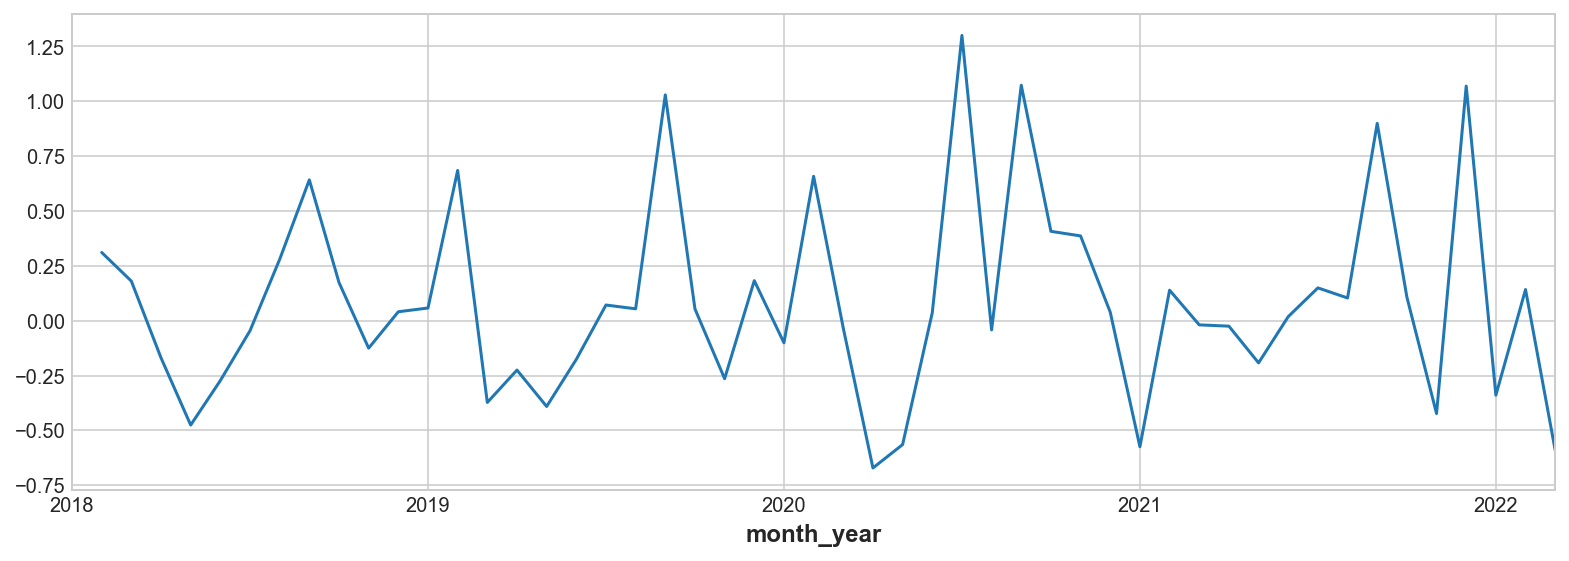

In [587]:
flu_trends.PATIENT_ID_COUNT.pct_change().plot()

In [602]:
flu_trends.PATIENT_ID_COUNT.pct_change()[1:].corr(data.tavg[:-1].pct_change()[1:])

nan

In [659]:
for sh in range(12):
    cor1 = pd.Series(flu_trends.PATIENT_ID_COUNT.pct_change()[1:]).reset_index(drop=True).shift(-sh).fillna(0)
    cor2 = pd.Series(data.tavg[:-1].pct_change()[1:]).reset_index(drop=True)
    print(cor1.corr(cor2))

-0.06417580979741487
0.02250092114205408
0.14118144584977046
0.22176692198809464
0.12883386102187286
0.019168390533101202
-0.060192140185869866
-0.1621198229272845
-0.03493780901316206
0.03750022489283038
-0.04497970898513469
0.02043814618039486


In [664]:
for sh in range(12):
    cor1 = pd.Series(flu_trends.PATIENT_ID_COUNT.diff()[1:]).reset_index(drop=True).shift(sh).fillna(0)
    cor2 = pd.Series(data.tavg[:-1].diff()[1:]).reset_index(drop=True)
    print(cor1.corr(cor2))

-0.2941965409111408
-0.16278038156263508
-0.3144270207615394
-0.1985883753370914
0.19419555431362068
0.08239732298087364
0.2955482434617382
0.2543930268057727
0.28567833315018476
0.10404052903111528
-0.07941739892006597
-0.10885793969789104


In [661]:
for sh in range(12):
    cor = pd.Series(data.tavg).reset_index(drop=True).corr(pd.Series(flu_trends.PATIENT_ID_COUNT).reset_index(drop=True).shift(-sh).fillna(0))
    print(cor)

-0.538324561245258
-0.2678961701573419
0.06754337664020182
0.4180993072467921
0.6149283850857821
0.6434223700554677
0.5356218527096469
0.279249588312017
0.0004965990130966684
-0.21641064847307917
-0.38776846208139465
-0.4382146984850754


<AxesSubplot:>

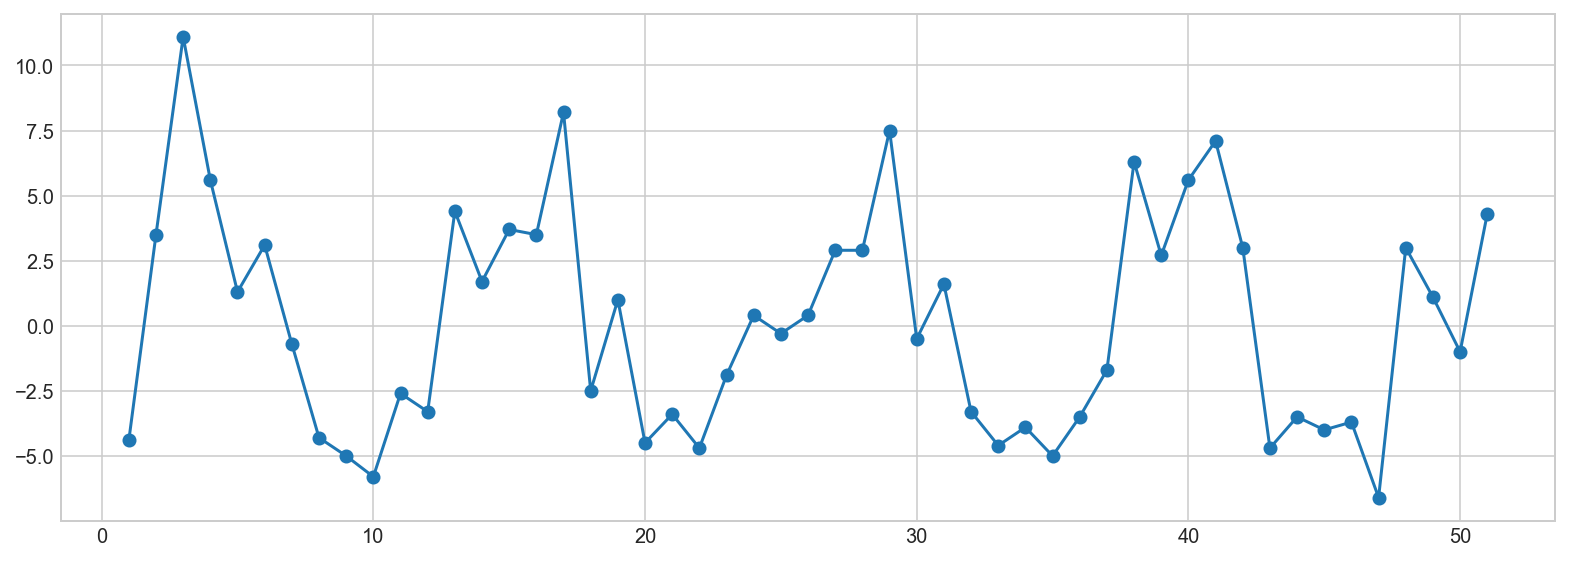

In [663]:
pd.Series(data.tavg).reset_index(drop=True).diff().plot(marker='o')

In [650]:
ft_moving_average = flu_trends.PATIENT_ID_COUNT.rolling(
    window=8,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=4,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

<AxesSubplot:xlabel='month_year'>

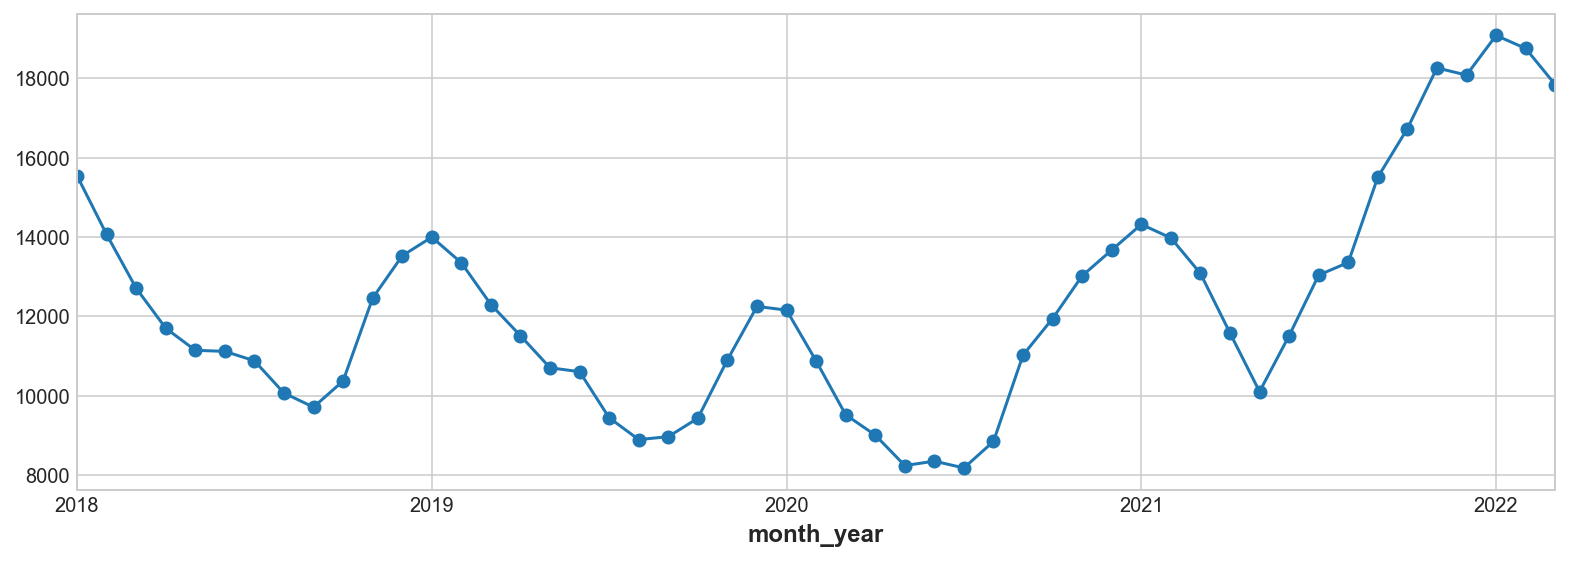

In [651]:
ft_moving_average.plot(marker='o')

In [603]:
data.tavg[:-1].pct_change()[1:]

time
2018-02-01   -44.000000
2018-03-01    -0.813953
2018-04-01   -13.875000
2018-05-01     0.543689
2018-06-01     0.081761
2018-07-01     0.180233
2018-08-01    -0.034483
2018-09-01    -0.219388
2018-10-01    -0.326797
2018-11-01    -0.563107
2018-12-01    -0.577778
2019-01-01    -1.736842
2019-02-01    -3.142857
2019-03-01     0.566667
2019-04-01     0.787234
2019-05-01     0.416667
2019-06-01     0.689076
2019-07-01    -0.124378
2019-08-01     0.056818
2019-09-01    -0.241935
2019-10-01    -0.241135
2019-11-01    -0.439252
2019-12-01    -0.316667
2020-01-01     0.097561
2020-02-01    -0.066667
2020-03-01     0.095238
2020-04-01     0.630435
2020-05-01     0.386667
2020-06-01     0.721154
2020-07-01    -0.027933
2020-08-01     0.091954
2020-09-01    -0.173684
2020-10-01    -0.292994
2020-11-01    -0.351351
2020-12-01    -0.694444
2021-01-01    -1.590909
2021-02-01     1.307692
2021-03-01    -2.100000
2021-04-01     0.818182
2021-05-01     0.933333
2021-06-01     0.612069
2021-07-01 

In [596]:
flu_trends.PATIENT_ID_COUNT.pct_change()

month_year
2018-01         NaN
2018-02    0.311129
2018-03    0.180372
2018-04   -0.169278
2018-05   -0.475703
2018-06   -0.272895
2018-07   -0.045754
2018-08    0.279547
2018-09    0.641869
2018-10    0.174162
2018-11   -0.125161
2018-12    0.040748
2019-01    0.057823
2019-02    0.684987
2019-03   -0.372757
2019-04   -0.225056
2019-05   -0.391071
2019-06   -0.176348
2019-07    0.071429
2019-08    0.054146
2019-09    1.029374
2019-10    0.053706
2019-11   -0.264375
2019-12    0.182449
2020-01   -0.100794
2020-02    0.658253
2020-03   -0.033914
2020-04   -0.671359
2020-05   -0.564710
2020-06    0.036013
2020-07    1.300323
2020-08   -0.042172
2020-09    1.073381
2020-10    0.407362
2020-11    0.386395
2020-12    0.038727
2021-01   -0.574522
2021-02    0.139031
2021-03   -0.019007
2021-04   -0.024977
2021-05   -0.192315
2021-06    0.018424
2021-07    0.149531
2021-08    0.103486
2021-09    0.899540
2021-10    0.107627
2021-11   -0.423381
2021-12    1.069414
2022-01   -0.339493
2022-02  

In [598]:
pd.Series(list(range(10))).corr(pd.Series(list(range(10))))

0.9999999999999999

In [601]:
pd.Series(data.tavg[:-1].pct_change())[1:]

time
2018-02-01   -44.000000
2018-03-01    -0.813953
2018-04-01   -13.875000
2018-05-01     0.543689
2018-06-01     0.081761
2018-07-01     0.180233
2018-08-01    -0.034483
2018-09-01    -0.219388
2018-10-01    -0.326797
2018-11-01    -0.563107
2018-12-01    -0.577778
2019-01-01    -1.736842
2019-02-01    -3.142857
2019-03-01     0.566667
2019-04-01     0.787234
2019-05-01     0.416667
2019-06-01     0.689076
2019-07-01    -0.124378
2019-08-01     0.056818
2019-09-01    -0.241935
2019-10-01    -0.241135
2019-11-01    -0.439252
2019-12-01    -0.316667
2020-01-01     0.097561
2020-02-01    -0.066667
2020-03-01     0.095238
2020-04-01     0.630435
2020-05-01     0.386667
2020-06-01     0.721154
2020-07-01    -0.027933
2020-08-01     0.091954
2020-09-01    -0.173684
2020-10-01    -0.292994
2020-11-01    -0.351351
2020-12-01    -0.694444
2021-01-01    -1.590909
2021-02-01     1.307692
2021-03-01    -2.100000
2021-04-01     0.818182
2021-05-01     0.933333
2021-06-01     0.612069
2021-07-01 

<AxesSubplot:xlabel='time'>

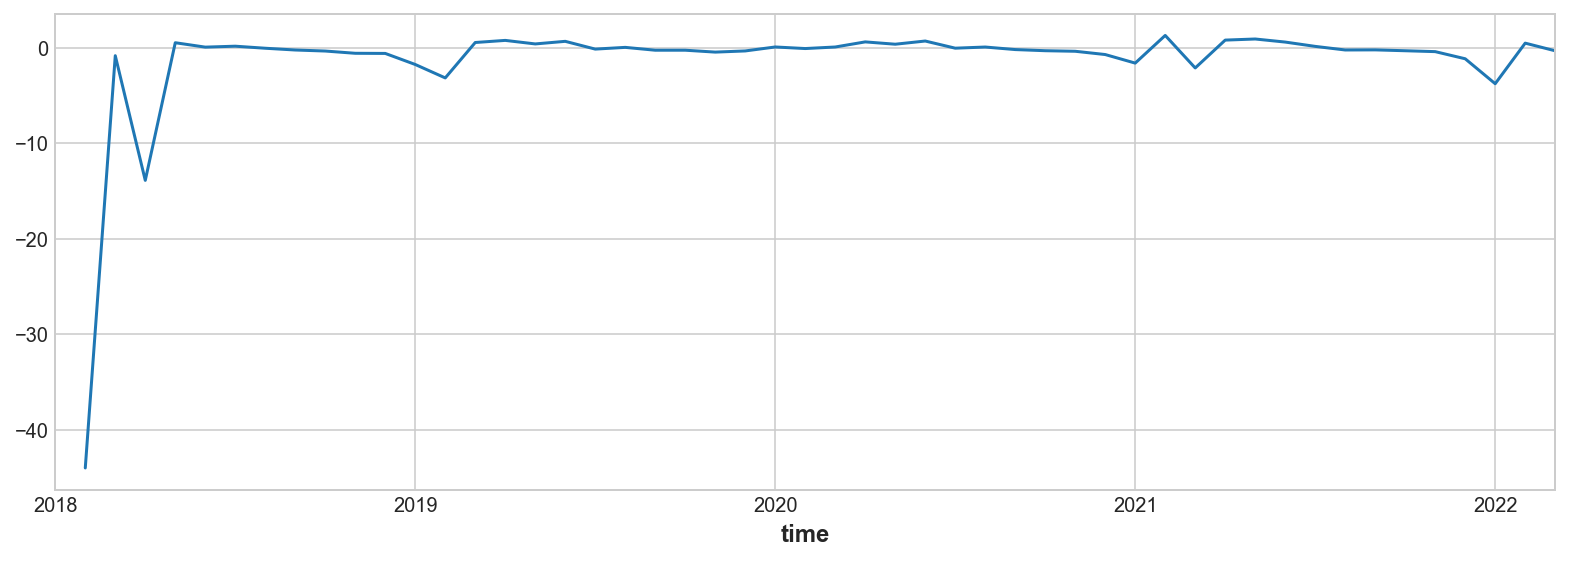

In [599]:
data.tavg[:-1].pct_change().plot()

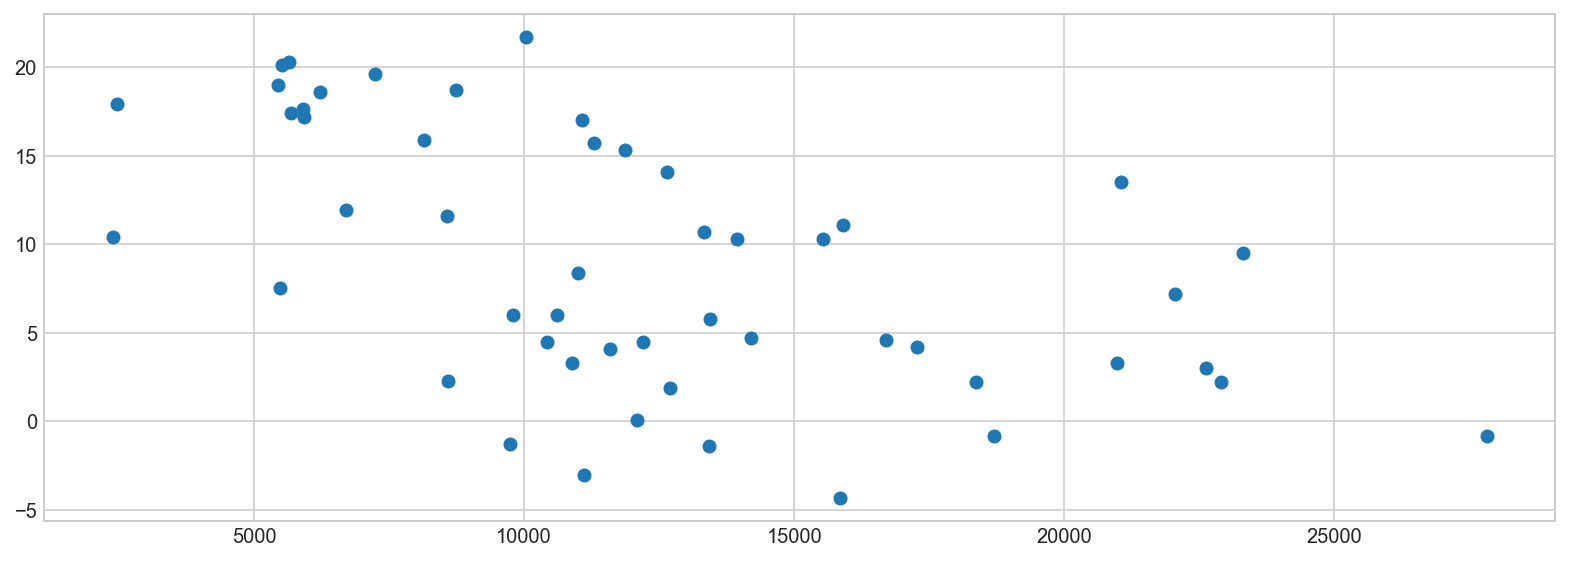

In [590]:
plt.scatter(flu_trends.PATIENT_ID_COUNT, data.tavg[:-1])

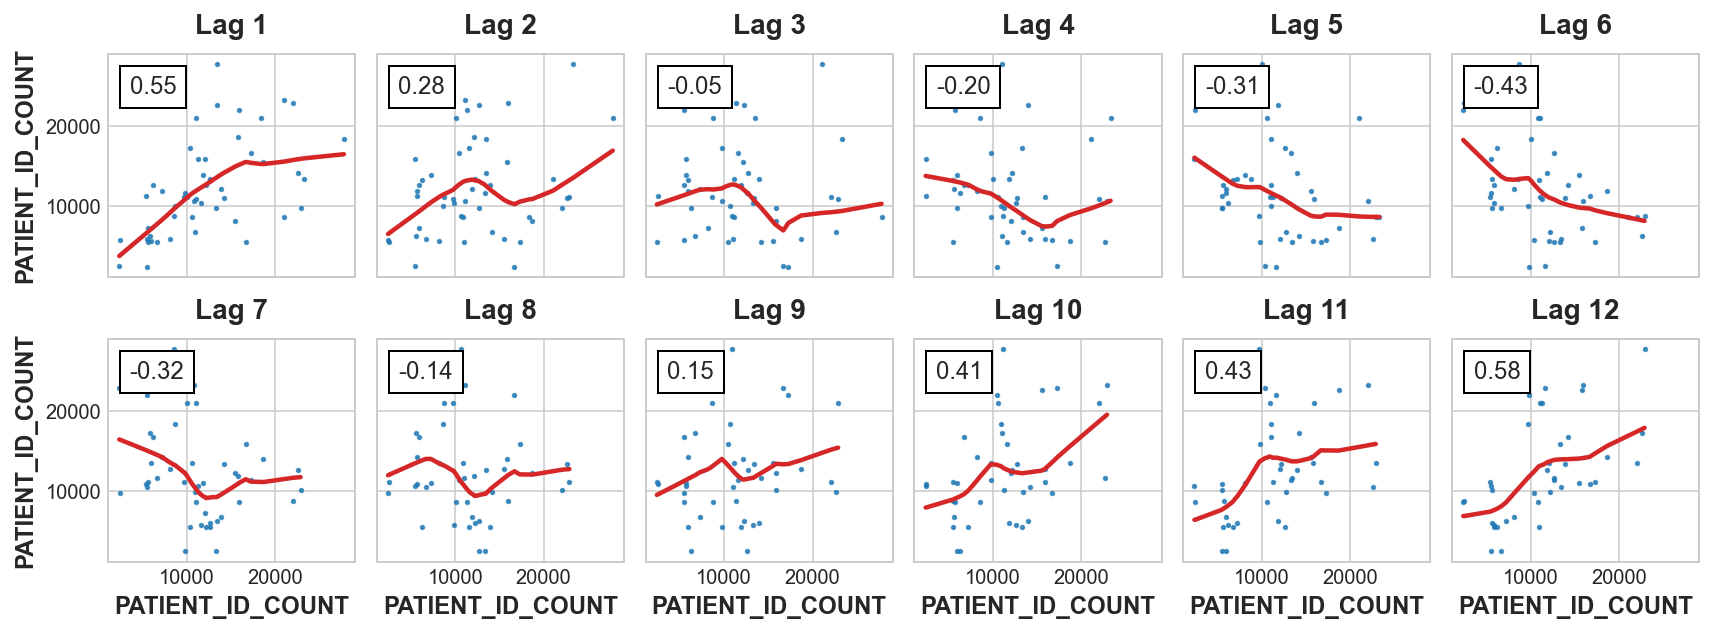

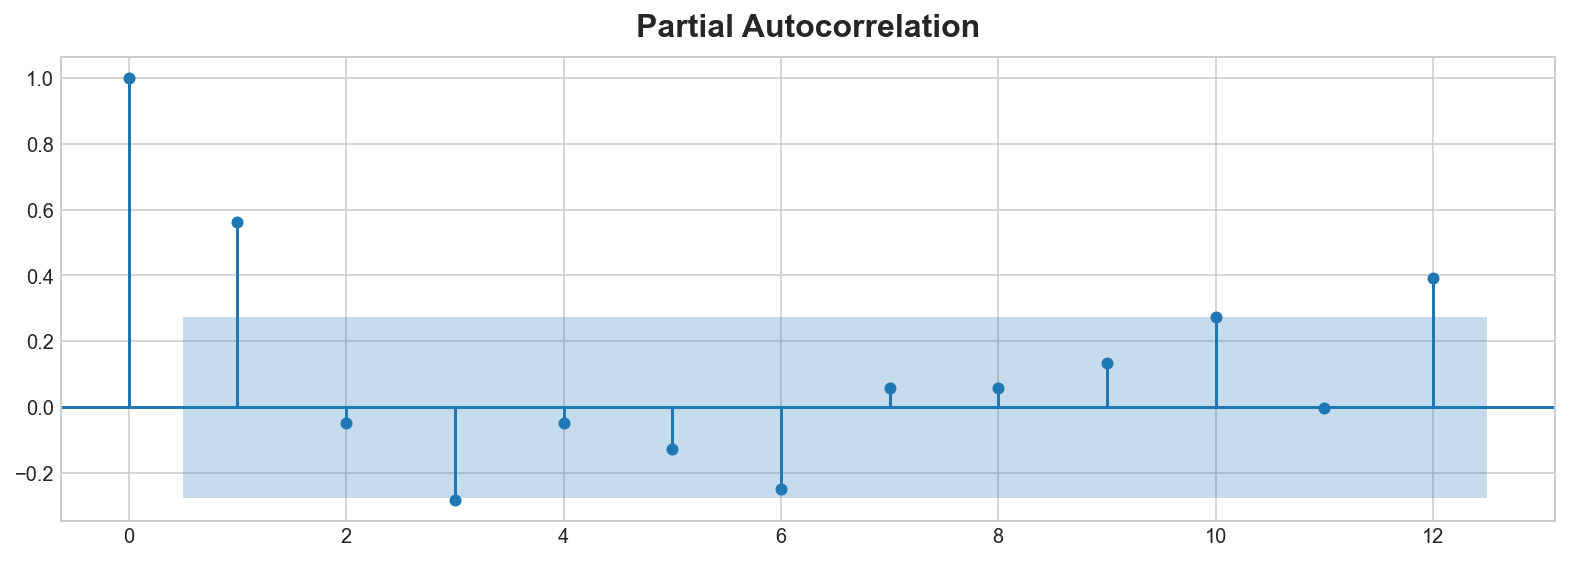

In [569]:
_ = plot_lags(flu_trends.PATIENT_ID_COUNT, lags=12, nrows=2)
_ = plot_pacf(flu_trends.PATIENT_ID_COUNT, lags=12)

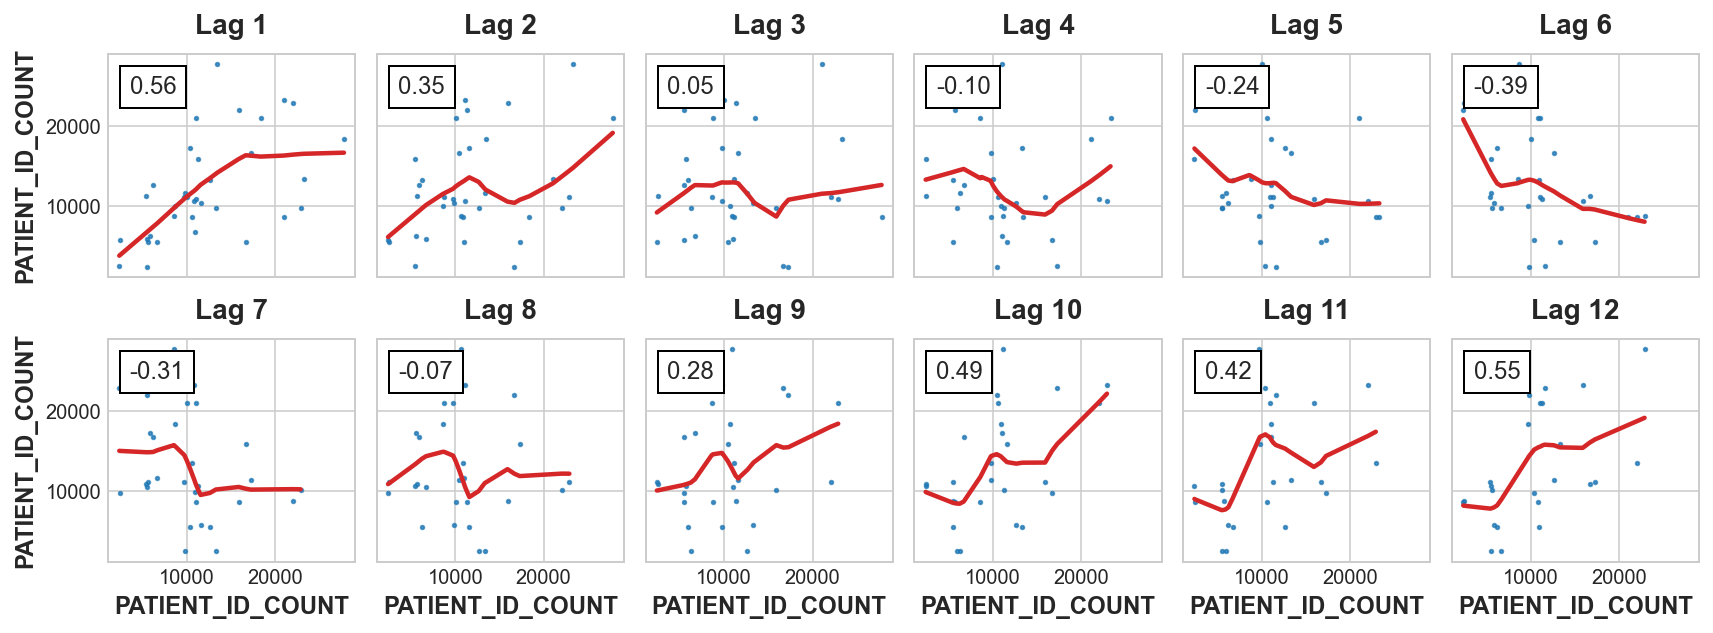

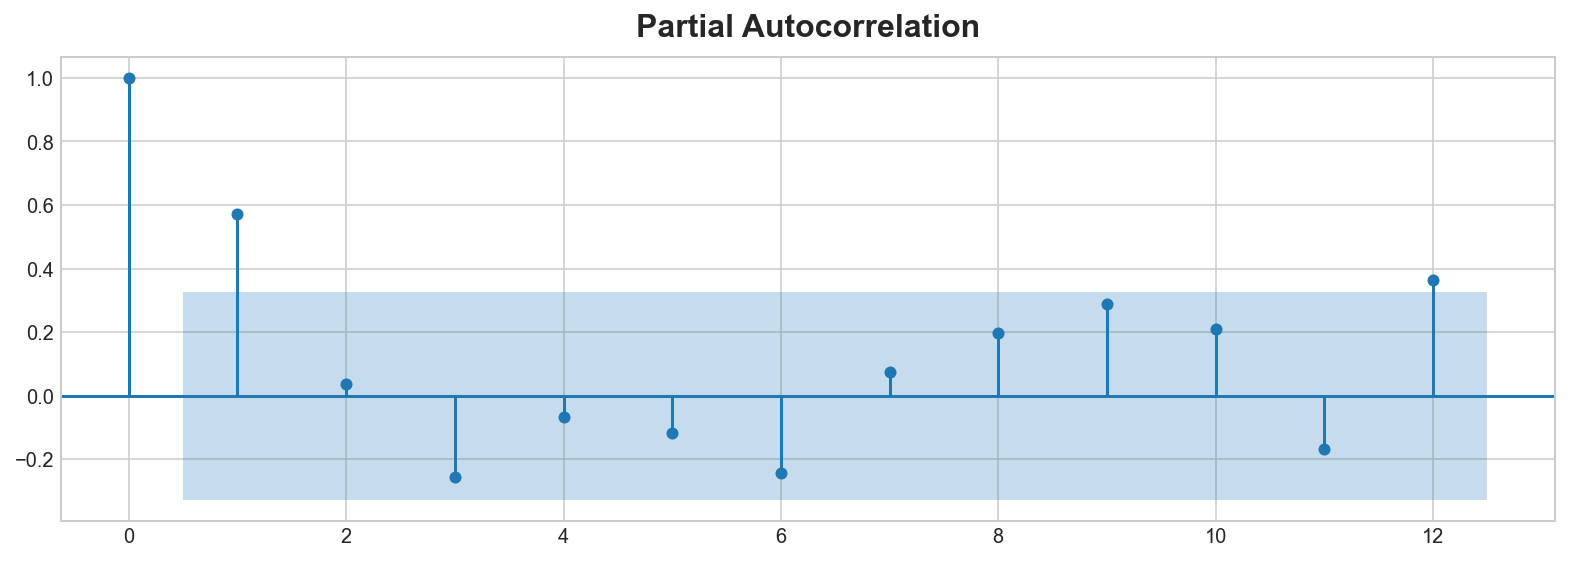

In [681]:
_ = plot_lags(flu_trends.PATIENT_ID_COUNT[-36:], lags=12, nrows=2)
_ = plot_pacf(flu_trends.PATIENT_ID_COUNT[-36:], lags=12)

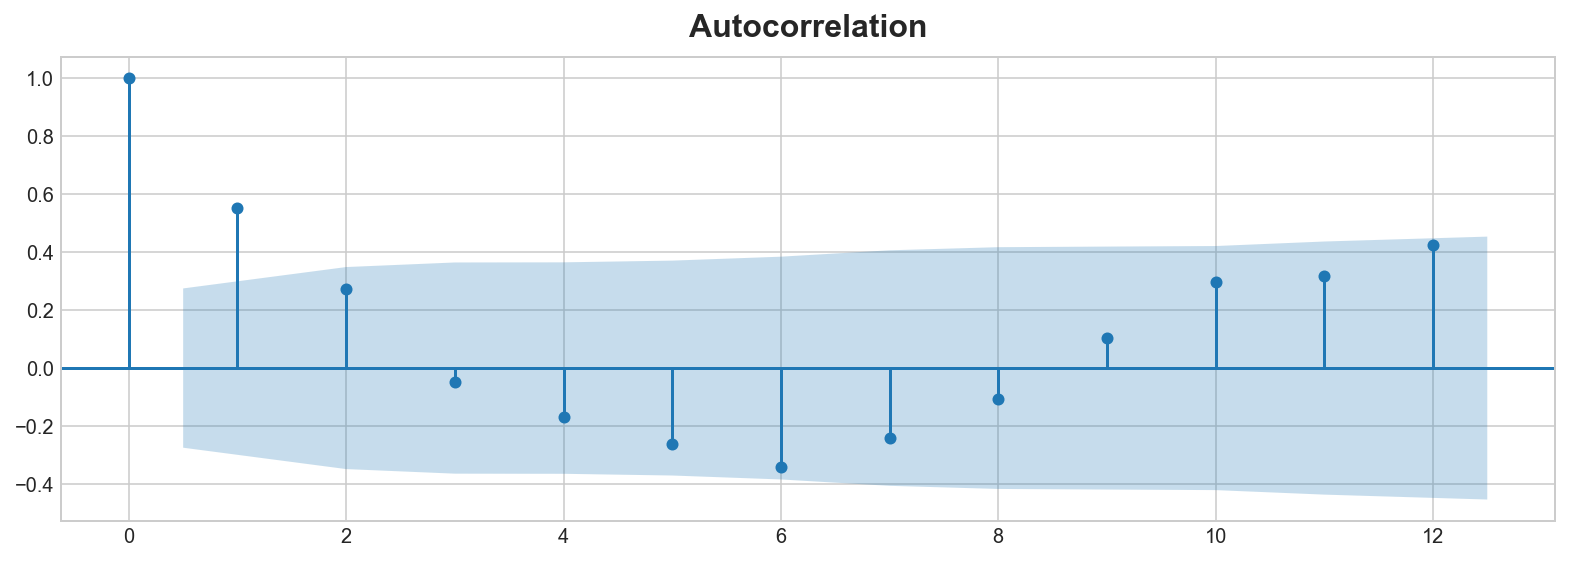

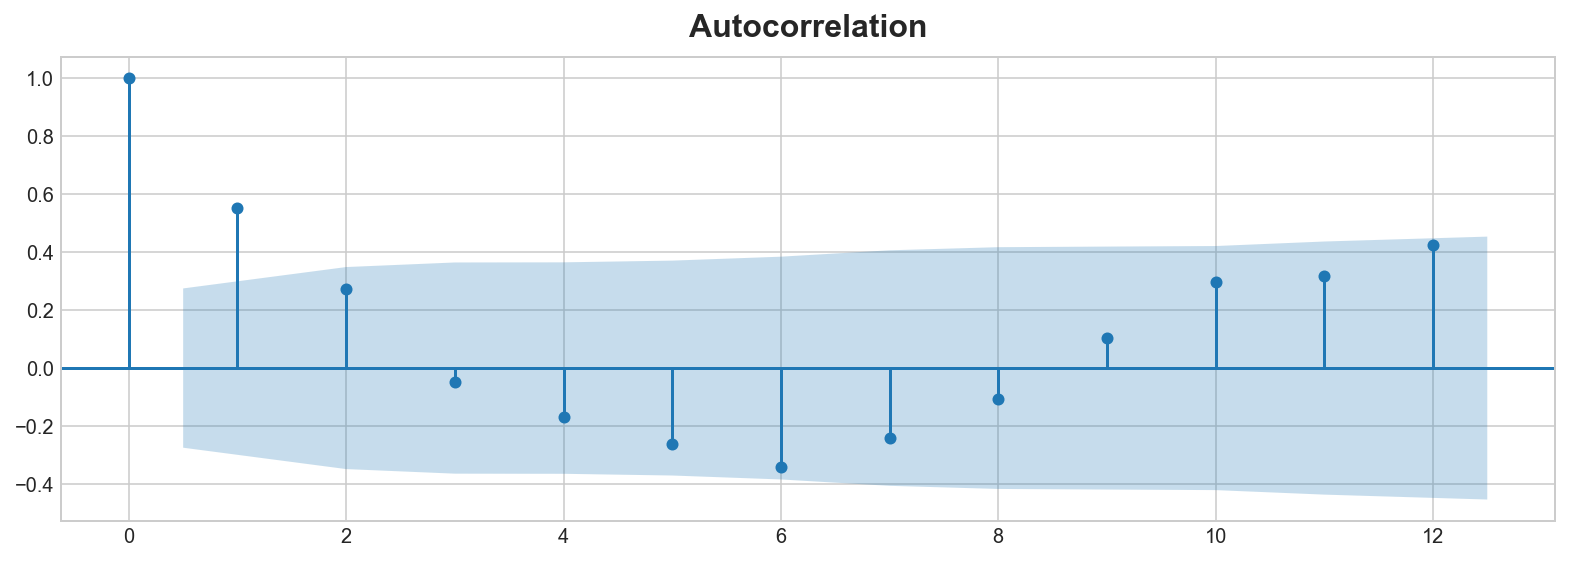

In [860]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(flu_trends.PATIENT_ID_COUNT, lags=12)

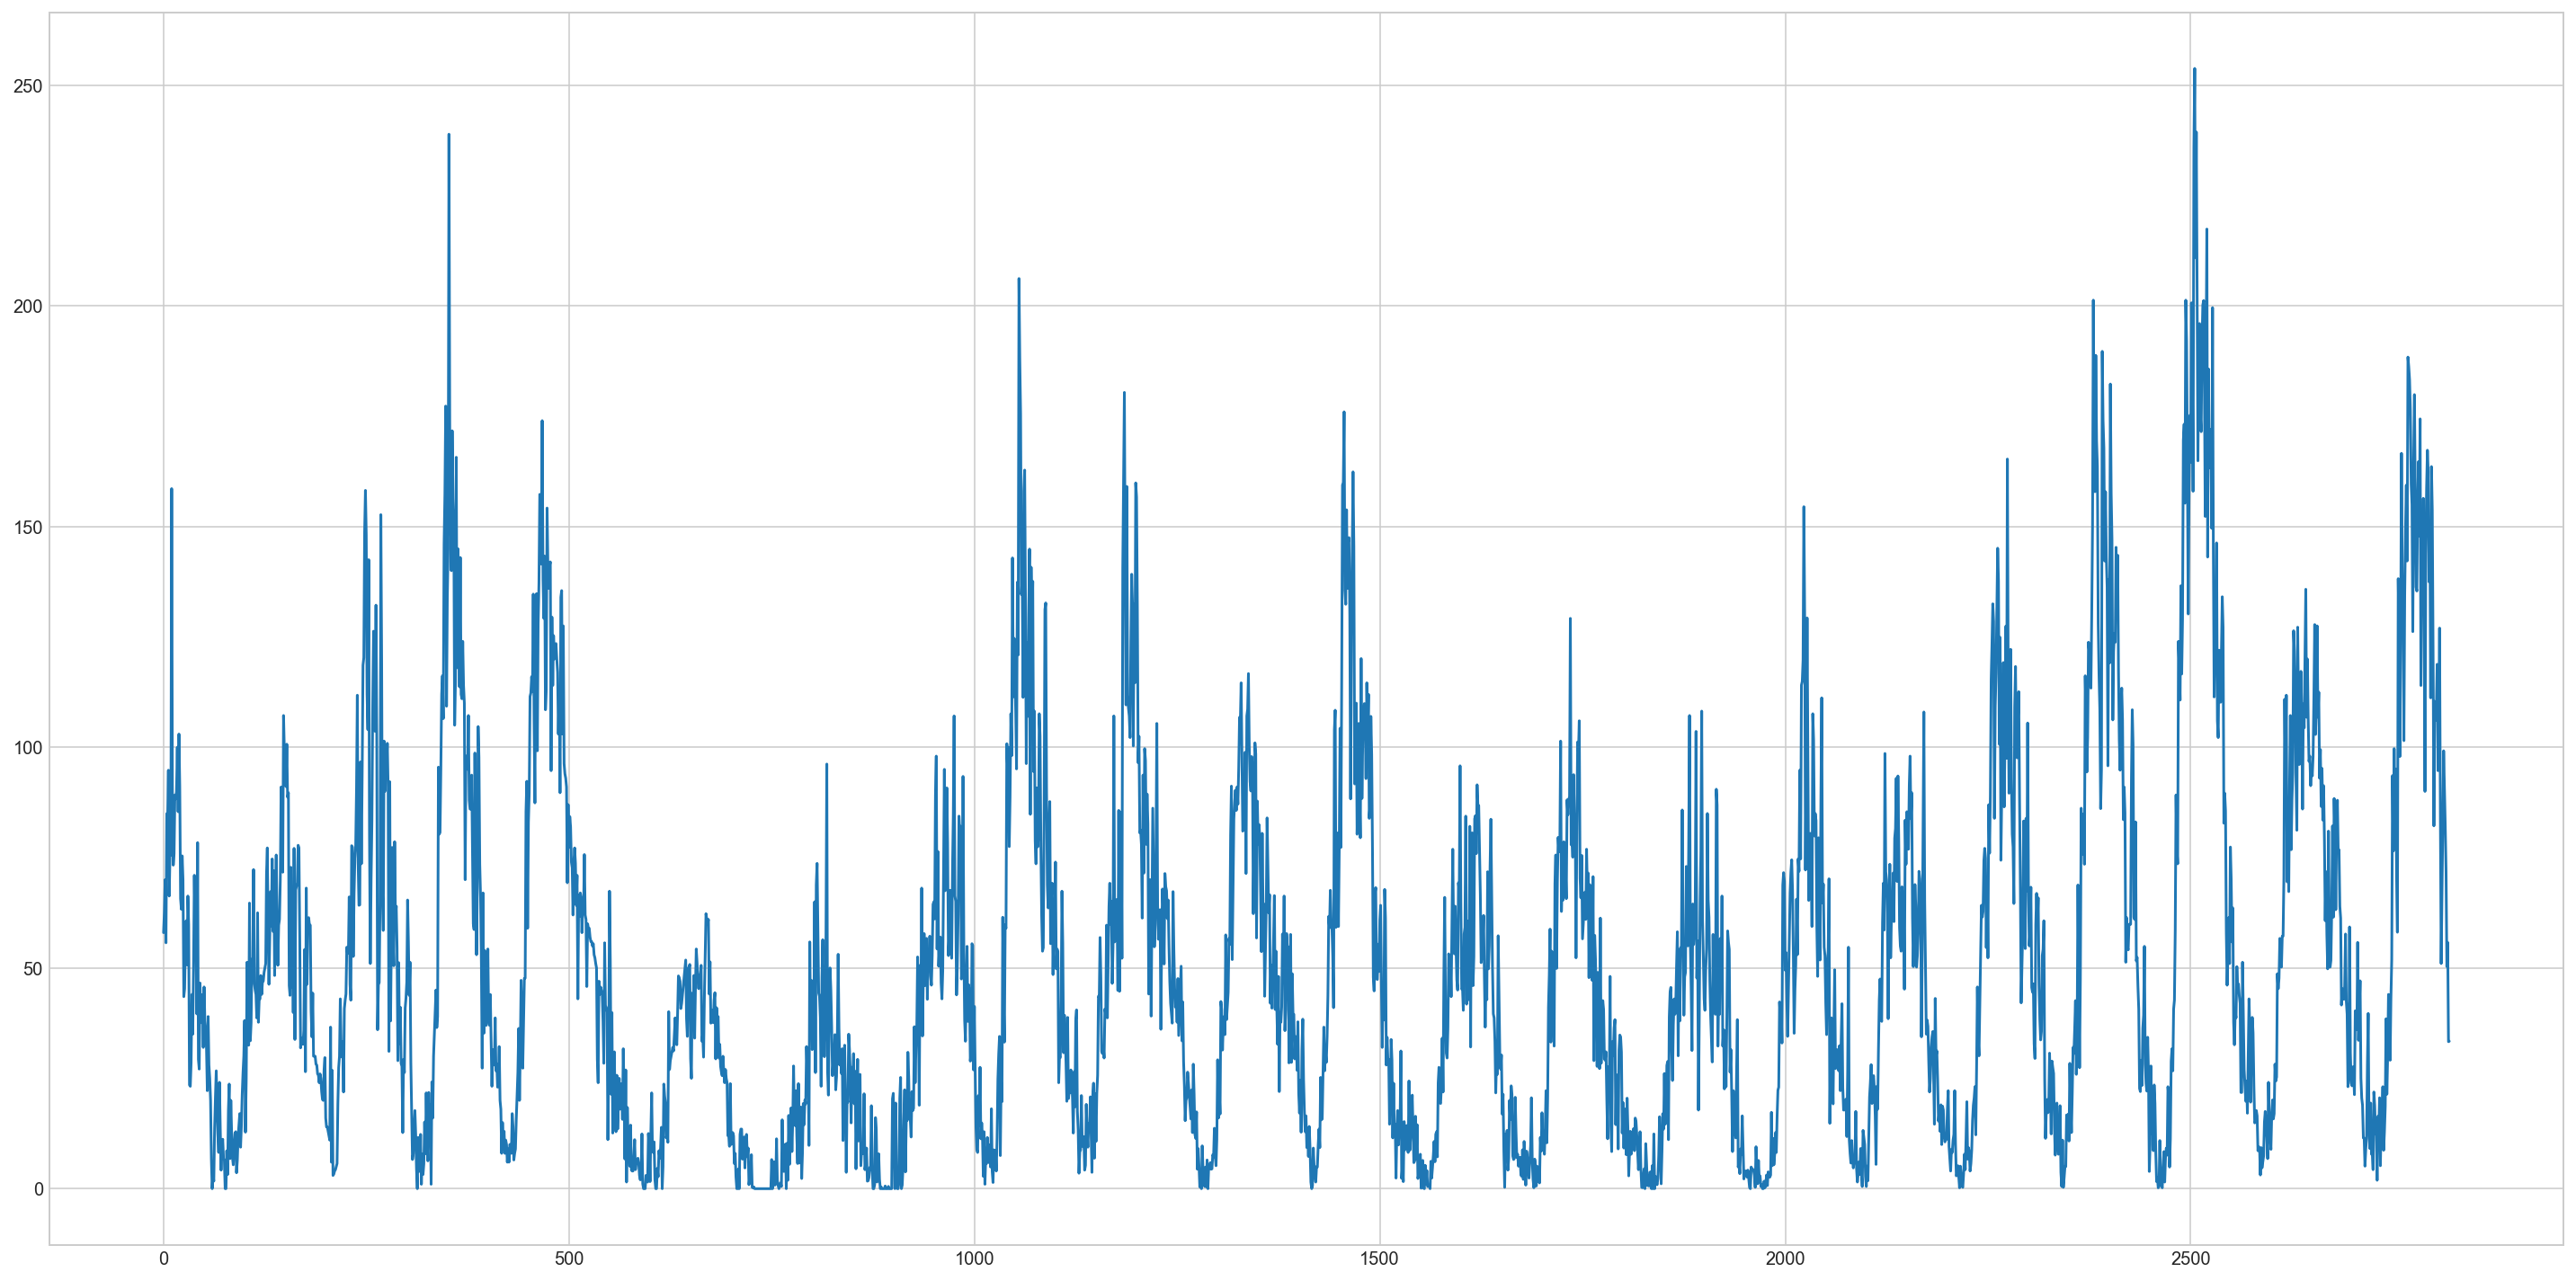

<Figure size 1440x720 with 0 Axes>

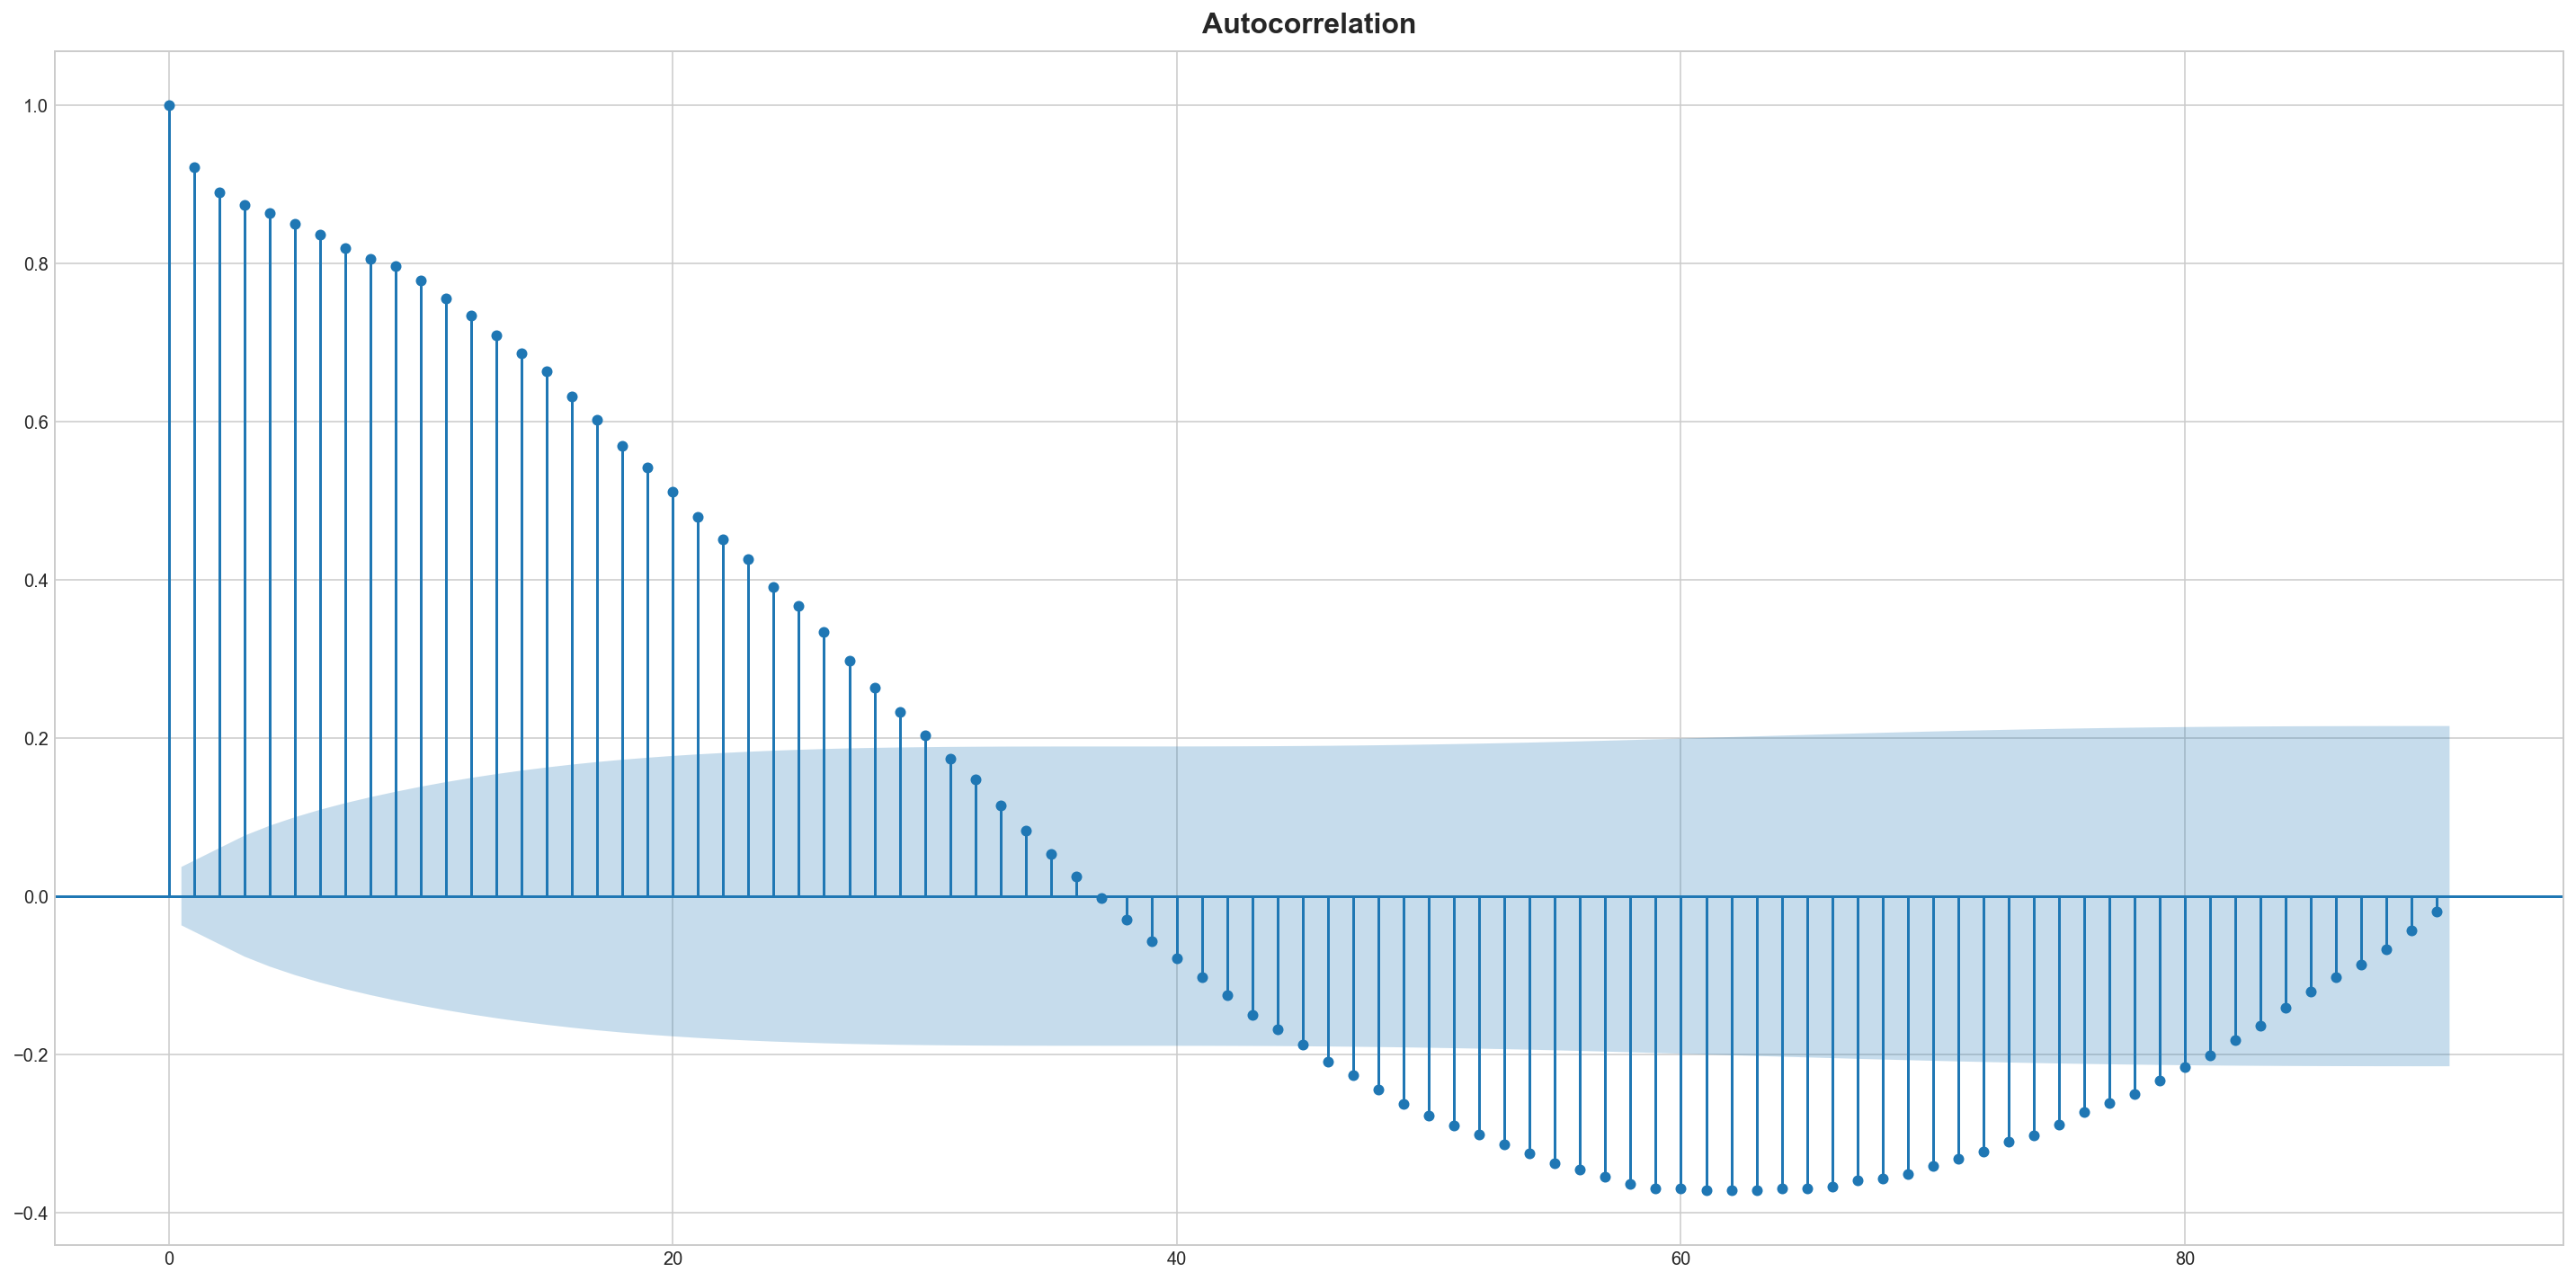

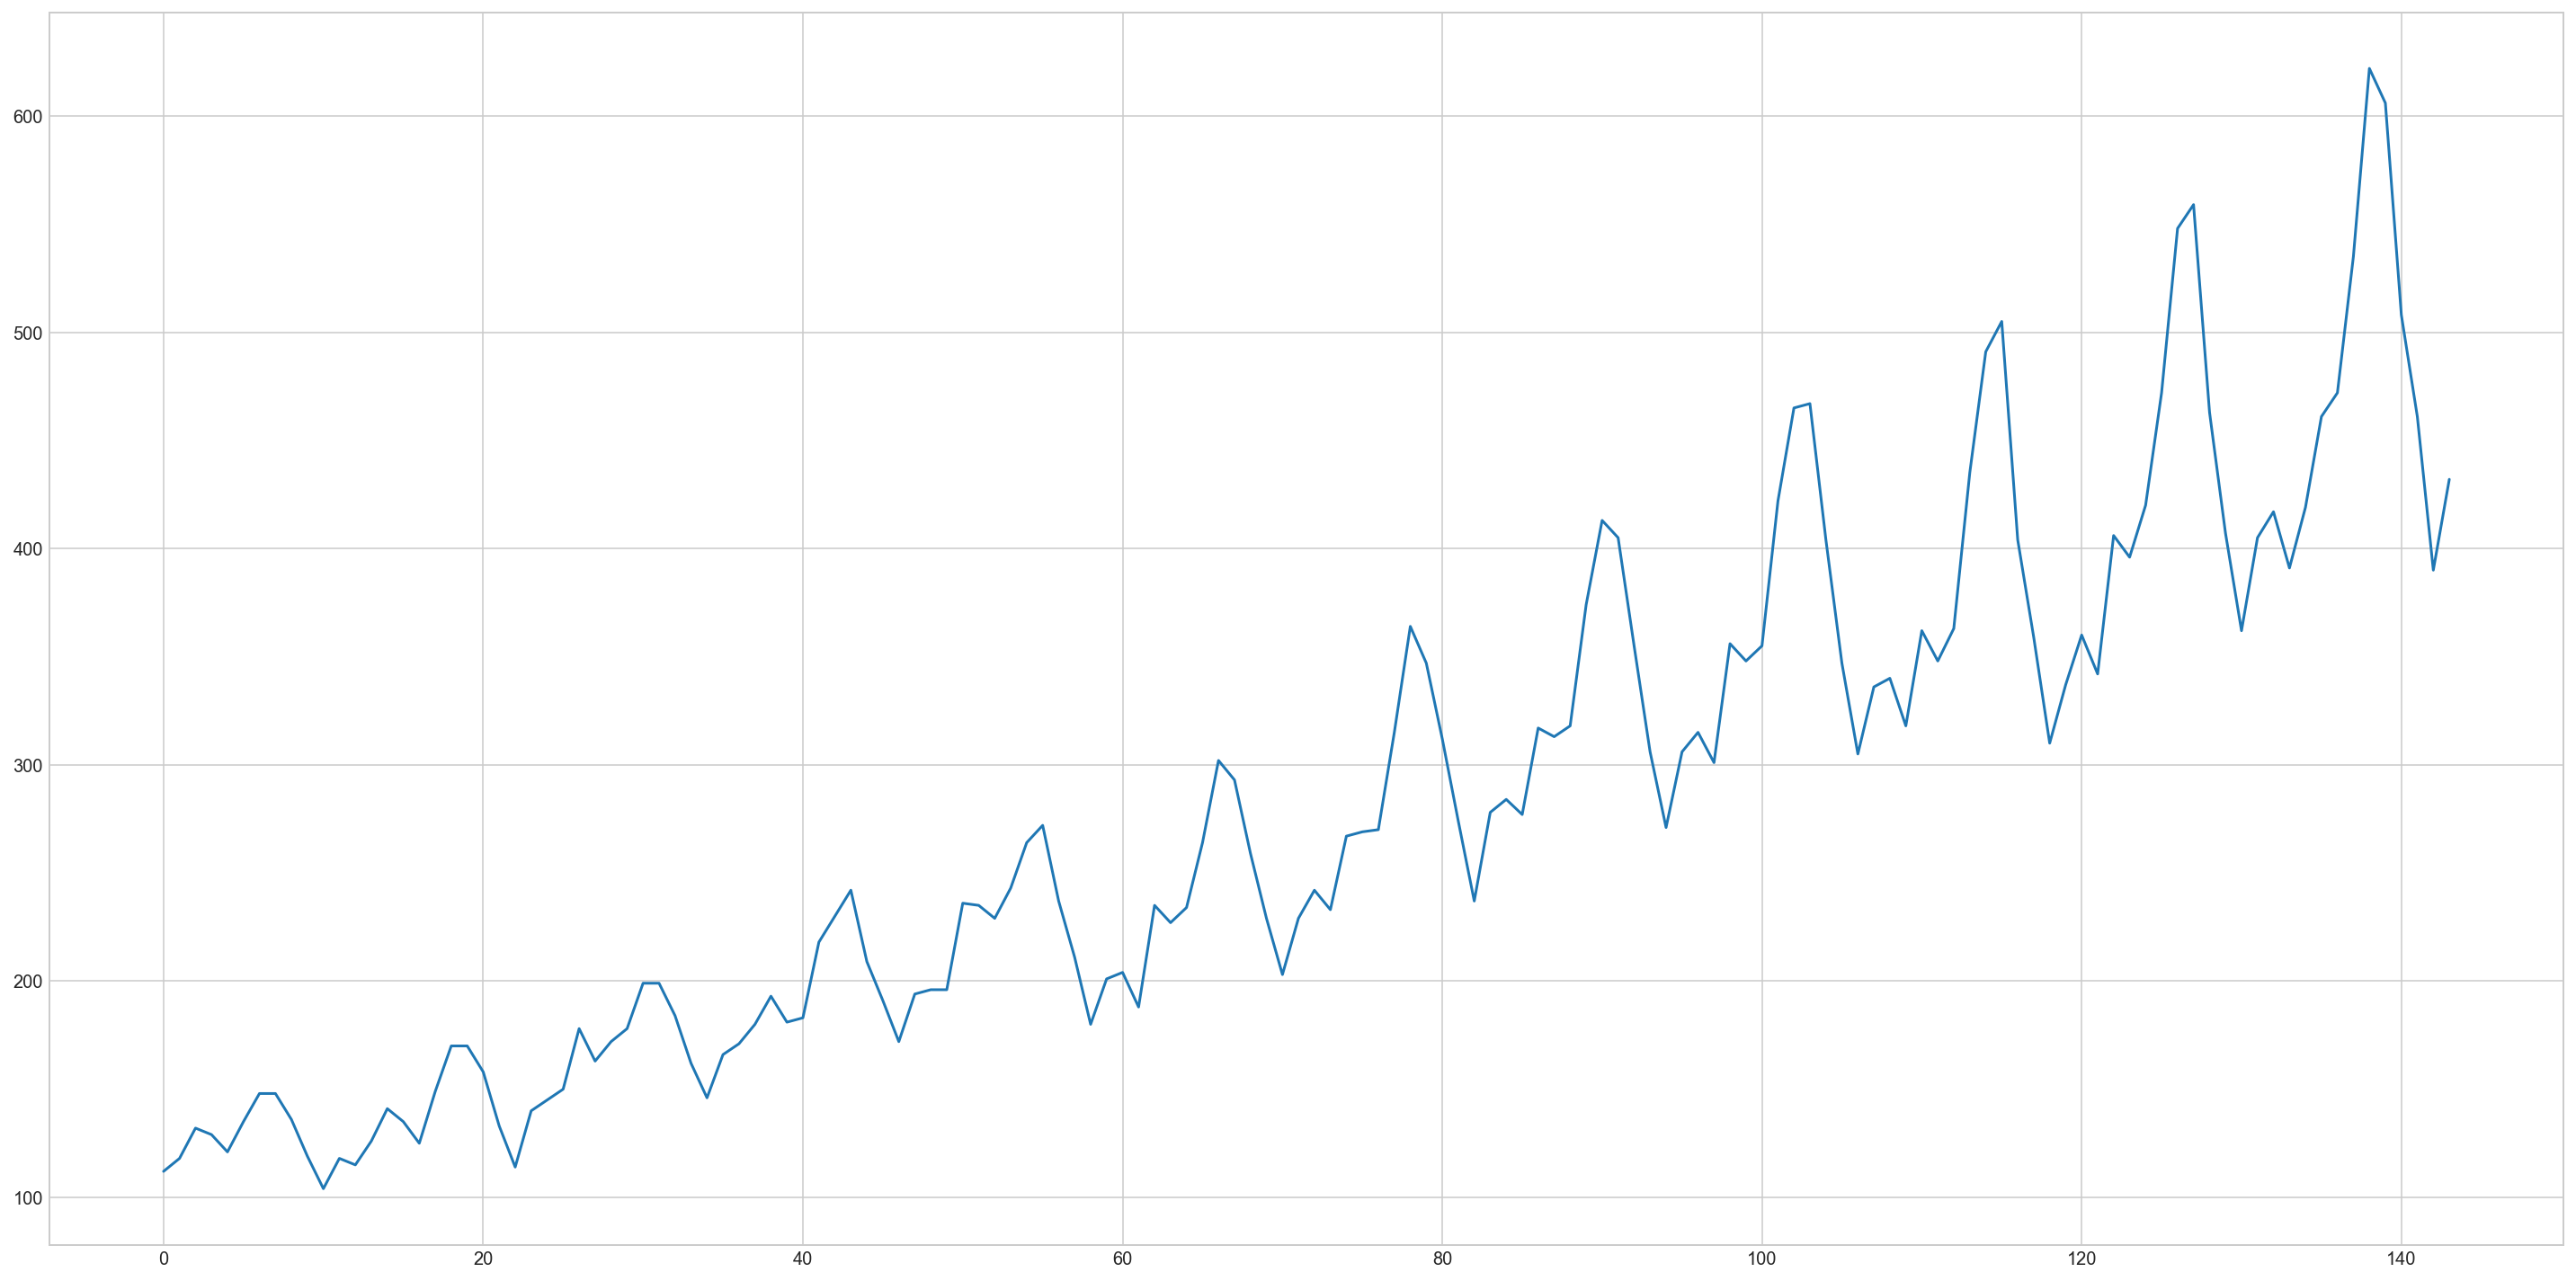

<Figure size 1440x720 with 0 Axes>

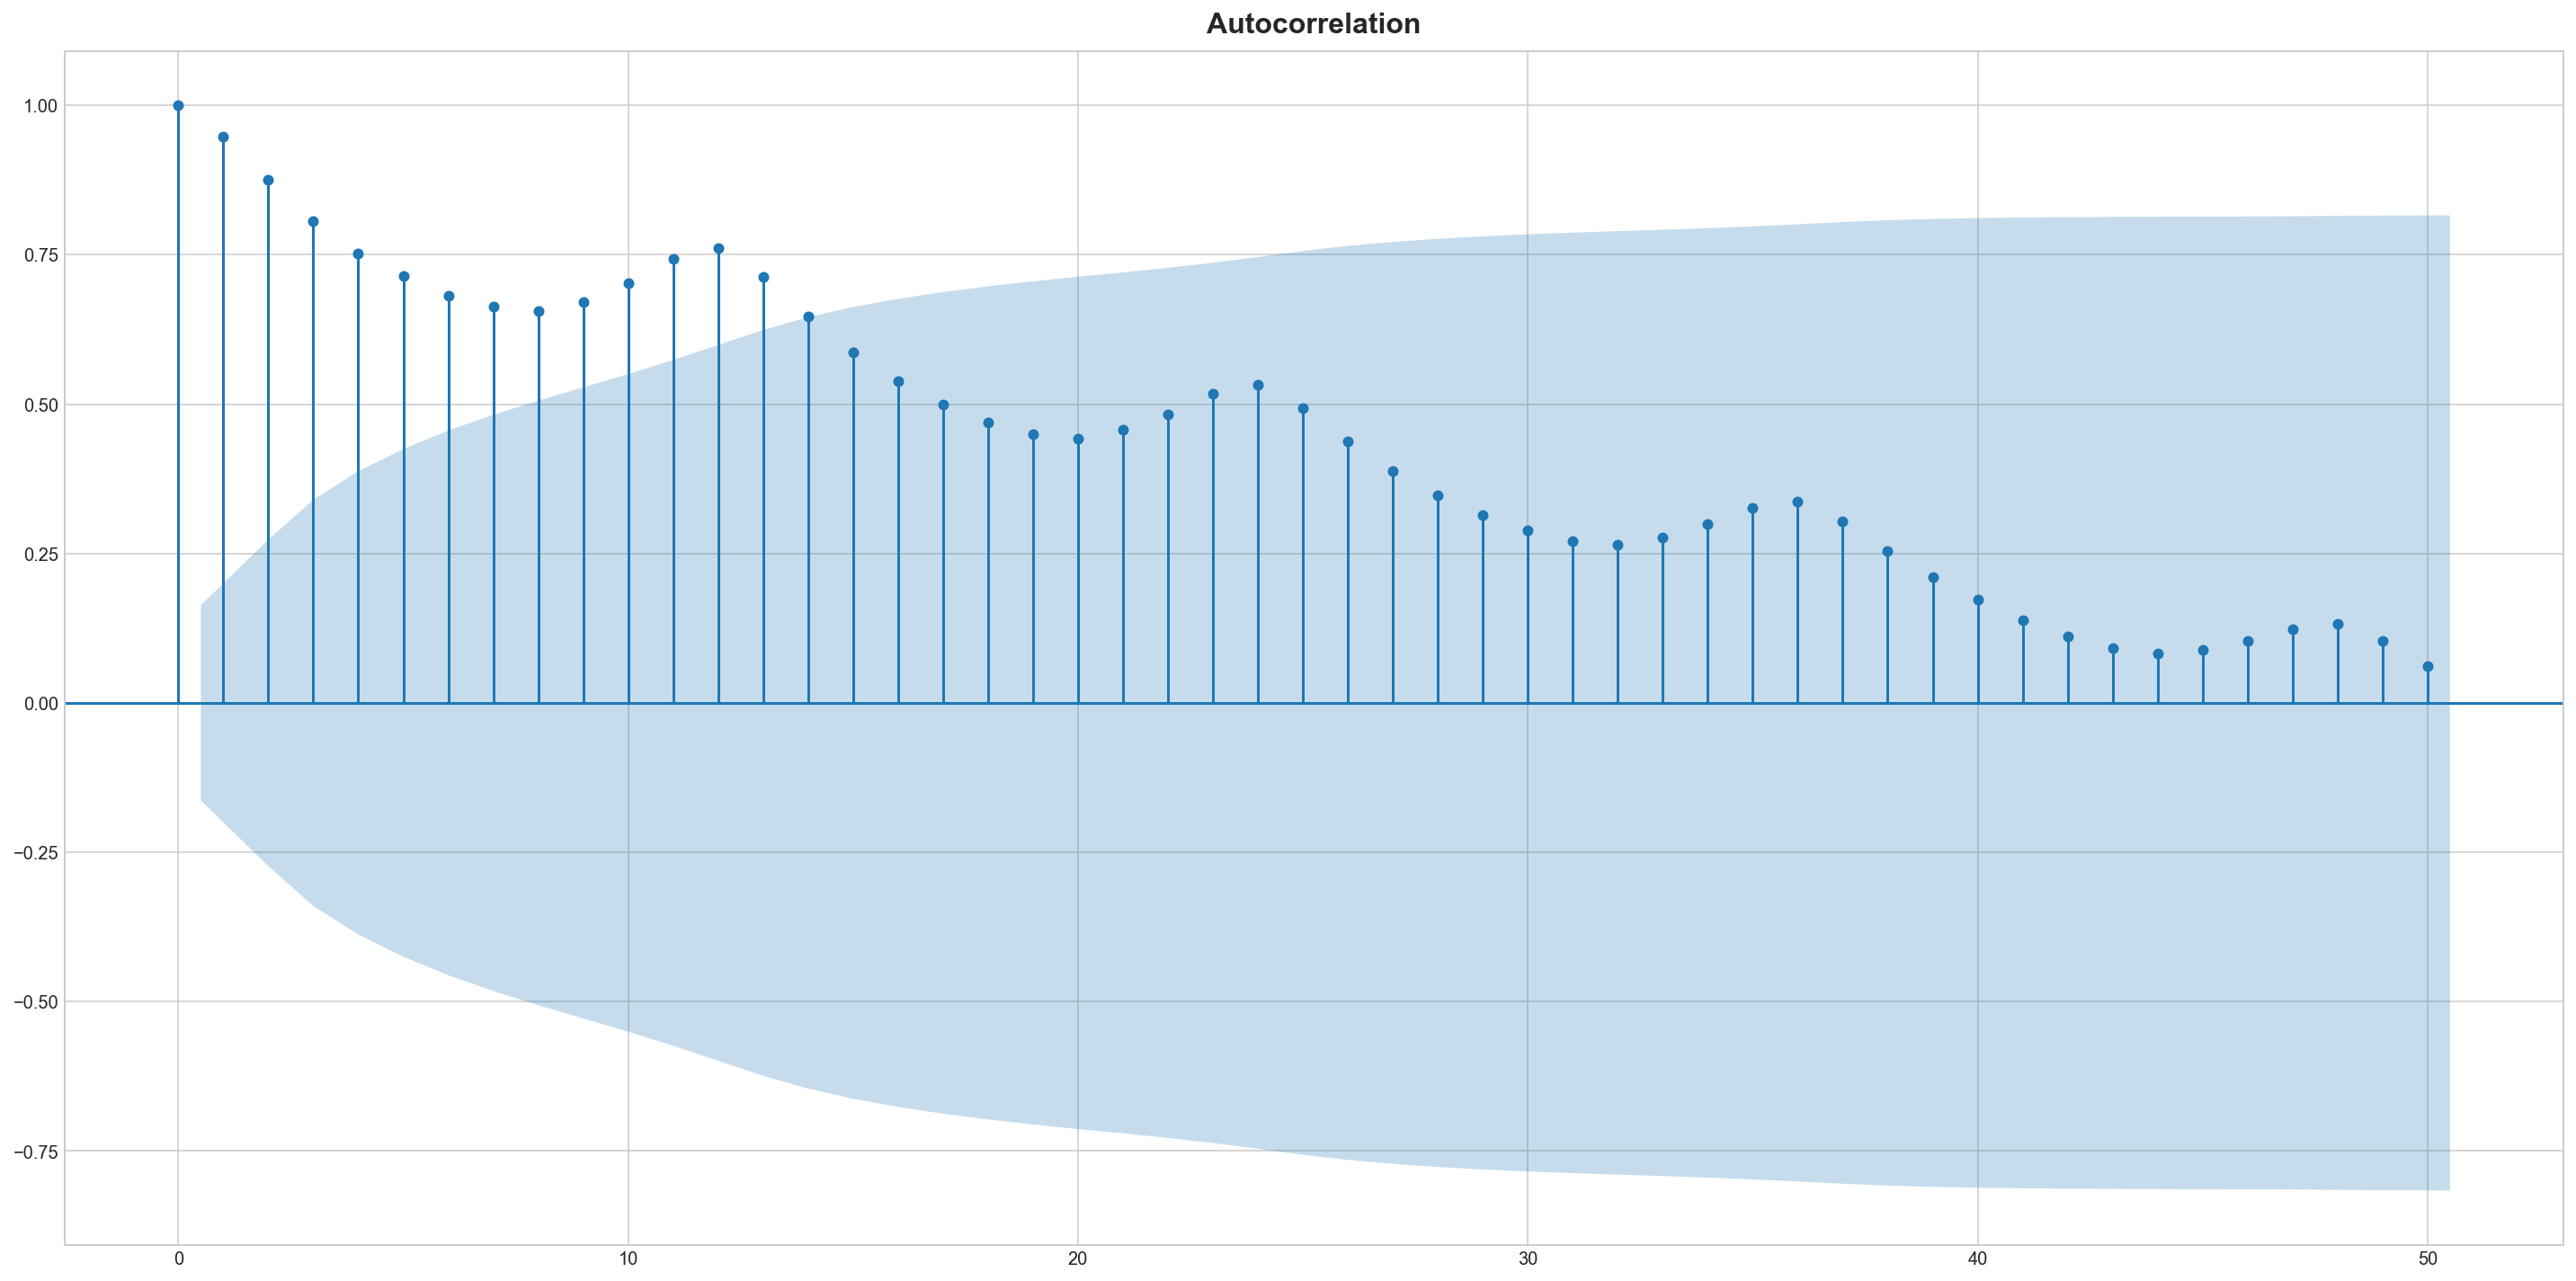

In [862]:
# https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711
# https://github.com/kdrelczuk/medium
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('monthly-sunspots.txt').drop(['Month'],axis=1)#.head(100)
data_a = data.to_numpy().T[0]
data_a
plt.figure(figsize=(20,10))
plt.plot(data_a)

plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(data_a, lags=90)
plt.show()

data = pd.read_csv('AirPassengers.csv').drop(['Month'],axis=1)#.head(100)
data_a = data.to_numpy().T[0]
data_a
plt.figure(figsize=(20,10))
plt.plot(data_a)

plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(data_a, lags=50)
plt.show()

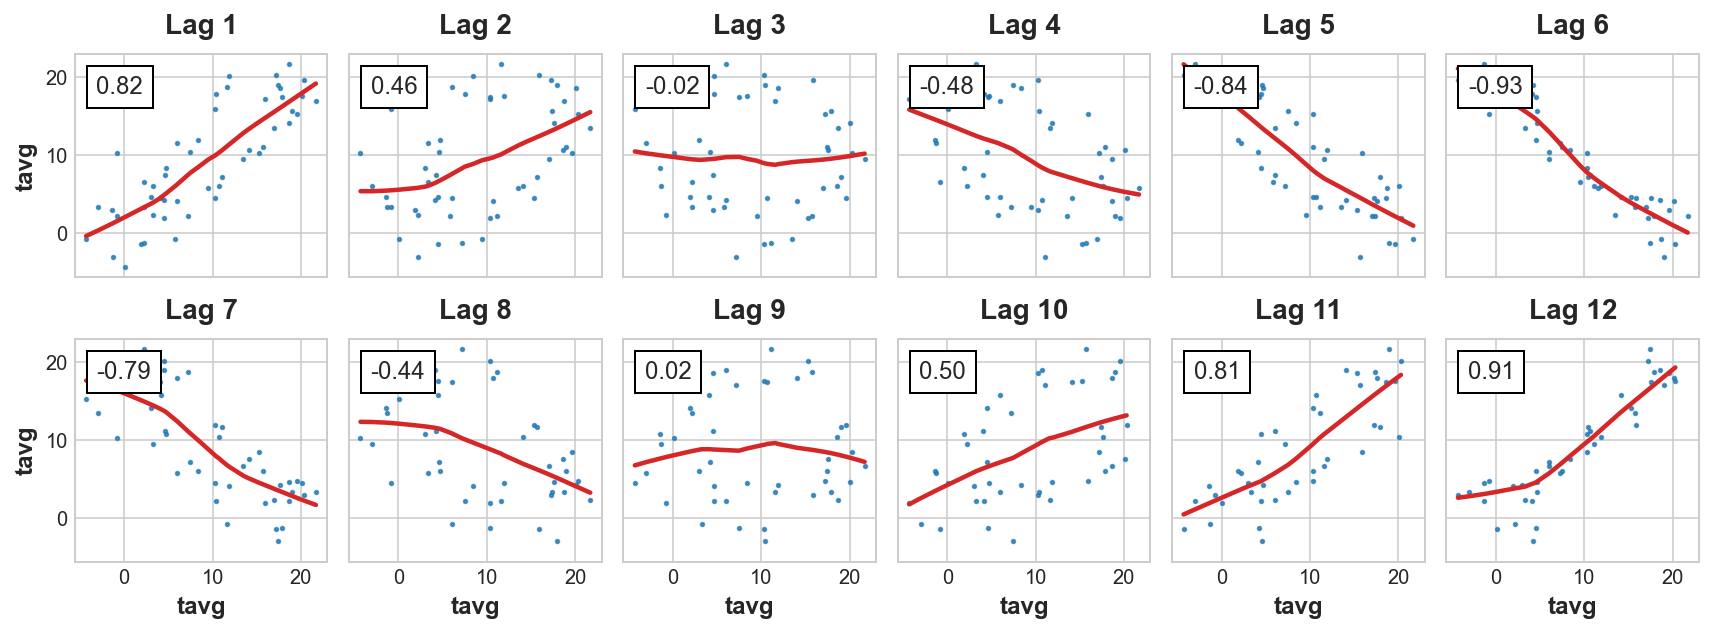

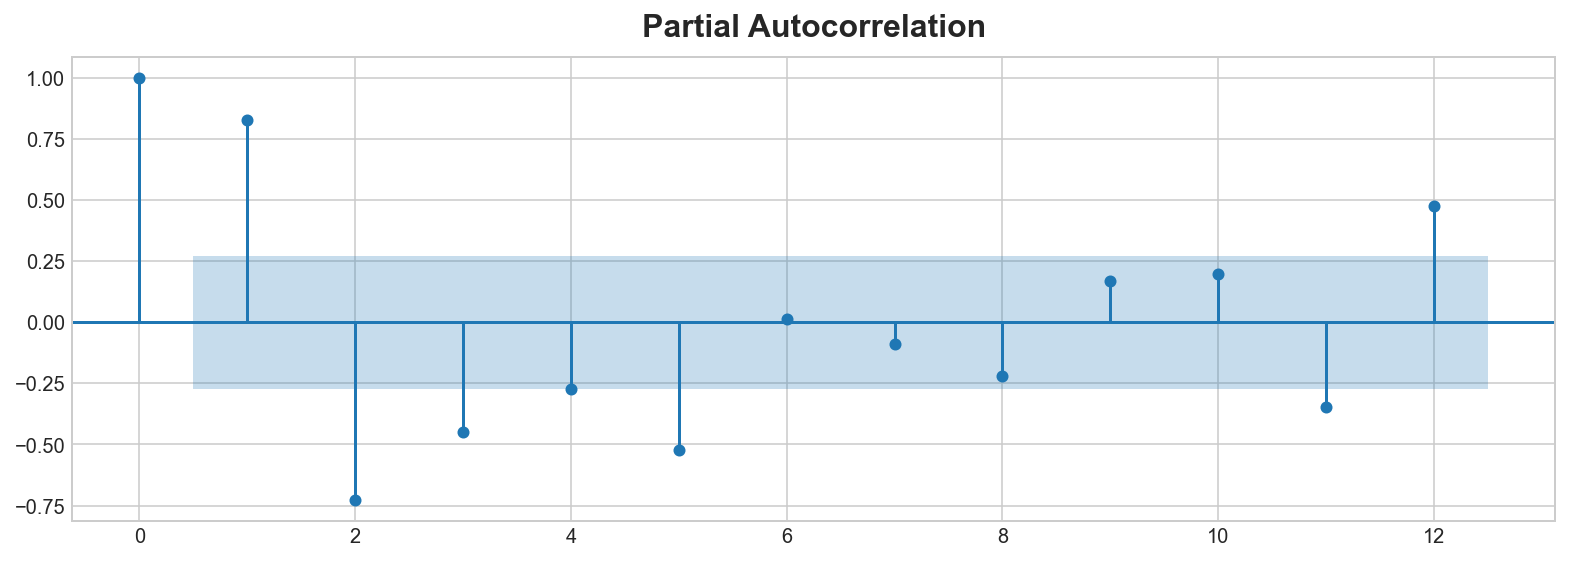

In [668]:
_ = plot_lags(data.tavg, lags=12, nrows=2)
_ = plot_pacf(data.tavg, lags=12)

In [667]:
data.tavg

time
2018-01-01     0.1
2018-02-01    -4.3
2018-03-01    -0.8
2018-04-01    10.3
2018-05-01    15.9
2018-06-01    17.2
2018-07-01    20.3
2018-08-01    19.6
2018-09-01    15.3
2018-10-01    10.3
2018-11-01     4.5
2018-12-01     1.9
2019-01-01    -1.4
2019-02-01     3.0
2019-03-01     4.7
2019-04-01     8.4
2019-05-01    11.9
2019-06-01    20.1
2019-07-01    17.6
2019-08-01    18.6
2019-09-01    14.1
2019-10-01    10.7
2019-11-01     6.0
2019-12-01     4.1
2020-01-01     4.5
2020-02-01     4.2
2020-03-01     4.6
2020-04-01     7.5
2020-05-01    10.4
2020-06-01    17.9
2020-07-01    17.4
2020-08-01    19.0
2020-09-01    15.7
2020-10-01    11.1
2020-11-01     7.2
2020-12-01     2.2
2021-01-01    -1.3
2021-02-01    -3.0
2021-03-01     3.3
2021-04-01     6.0
2021-05-01    11.6
2021-06-01    18.7
2021-07-01    21.7
2021-08-01    17.0
2021-09-01    13.5
2021-10-01     9.5
2021-11-01     5.8
2021-12-01    -0.8
2022-01-01     2.2
2022-02-01     3.3
2022-03-01     2.3
2022-04-01     6.6
Freq: M

In [570]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(flu_trends.PATIENT_ID_COUNT, lags=1)
X = X.fillna(0.0)

In [572]:
# Create target series and data splits
y = flu_trends.PATIENT_ID_COUNT.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

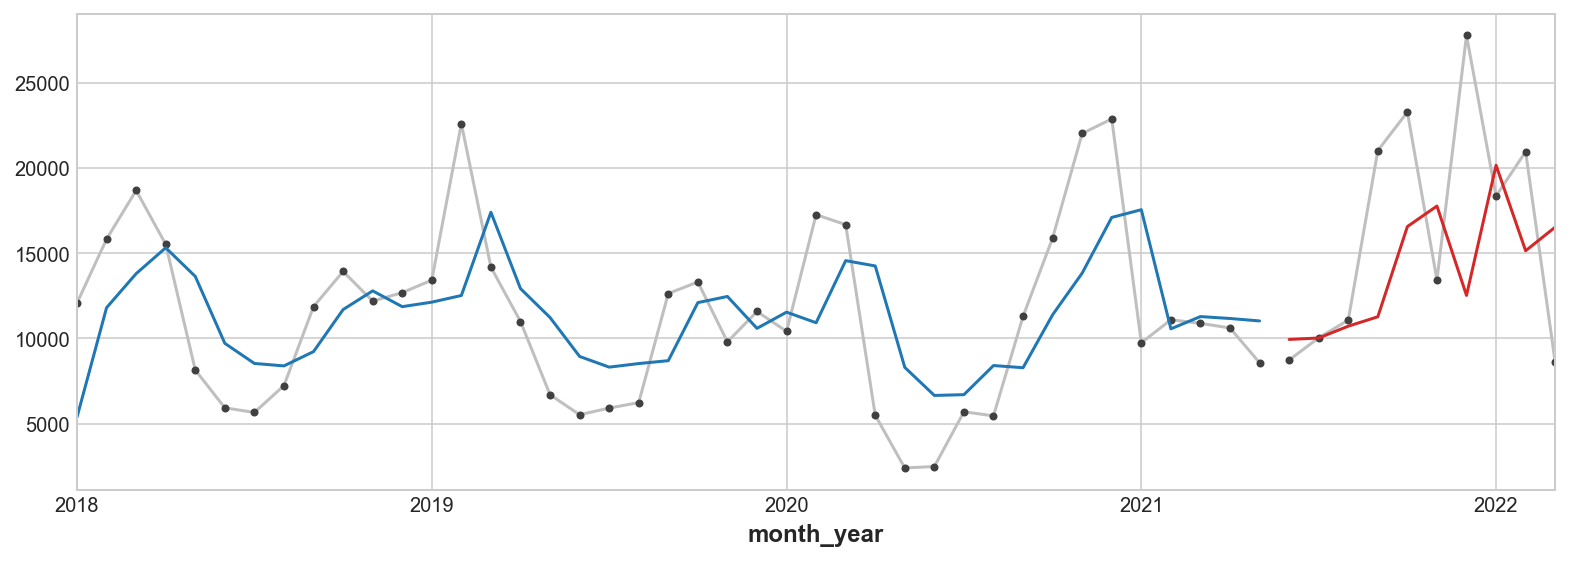

In [573]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

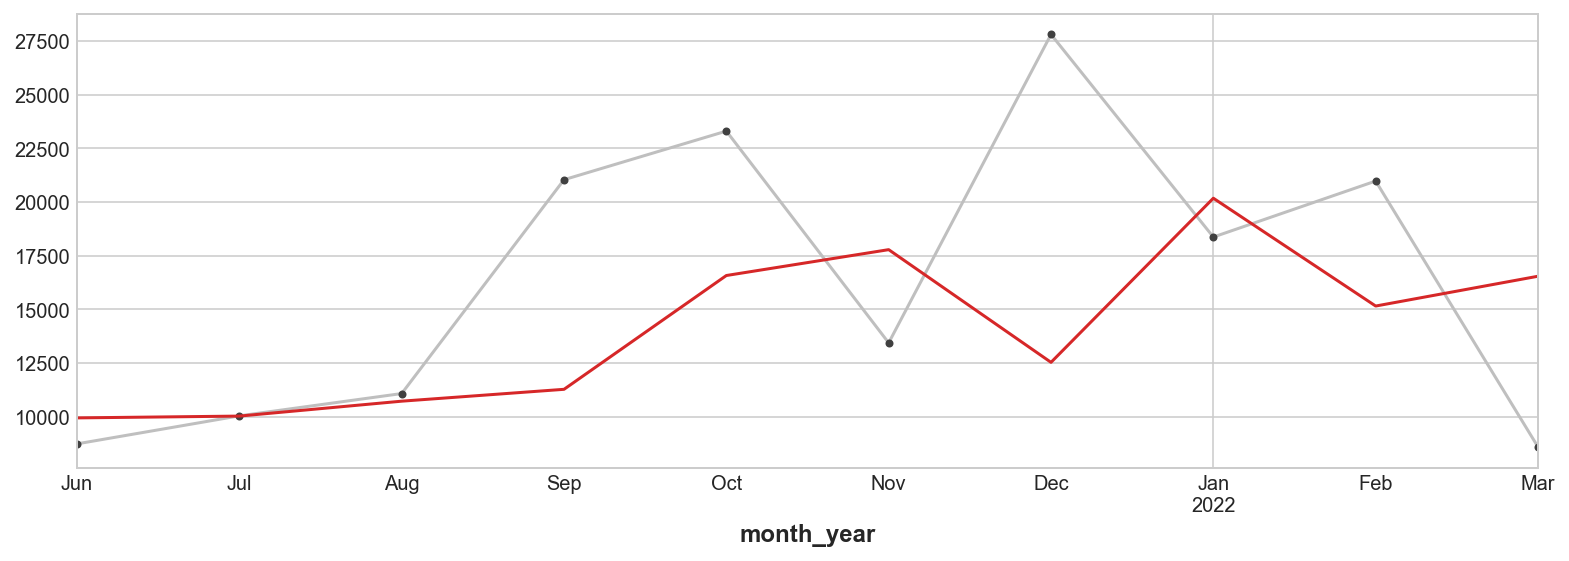

In [574]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

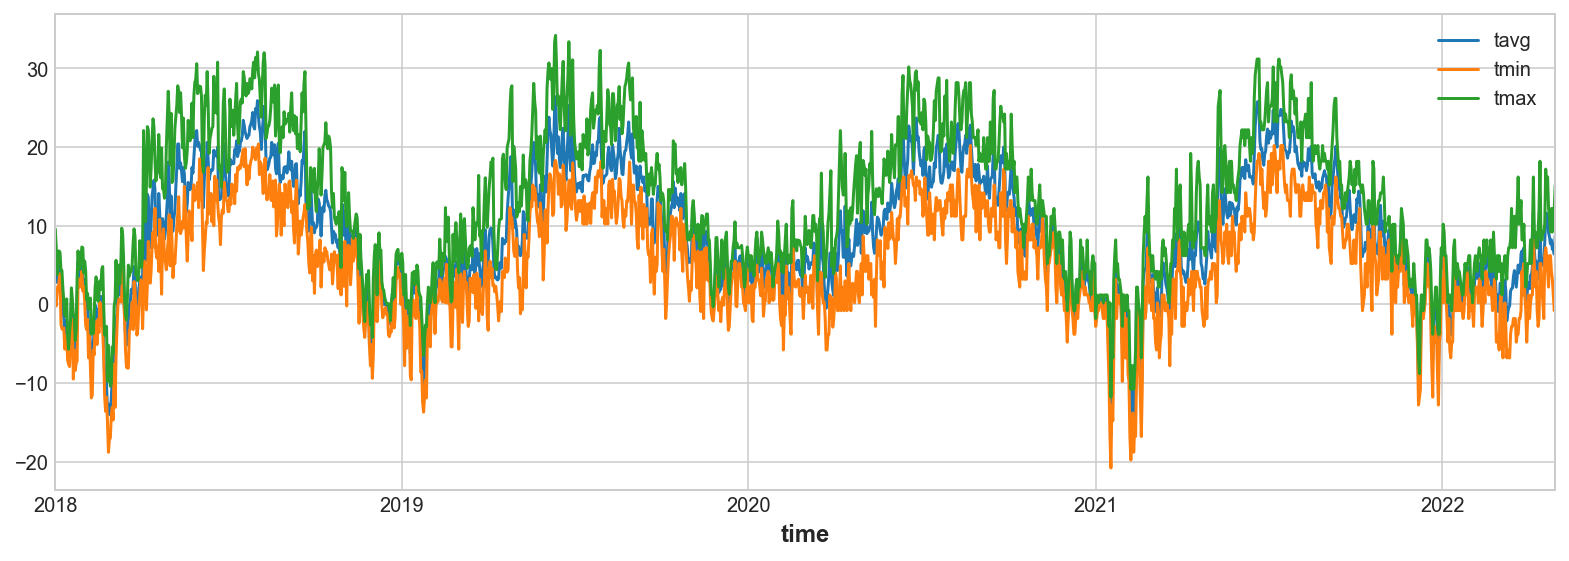

In [576]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2022, 4, 30)

# Create Point for Kaliningrad
location = Point(54.710128, 20.5105838, 0)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

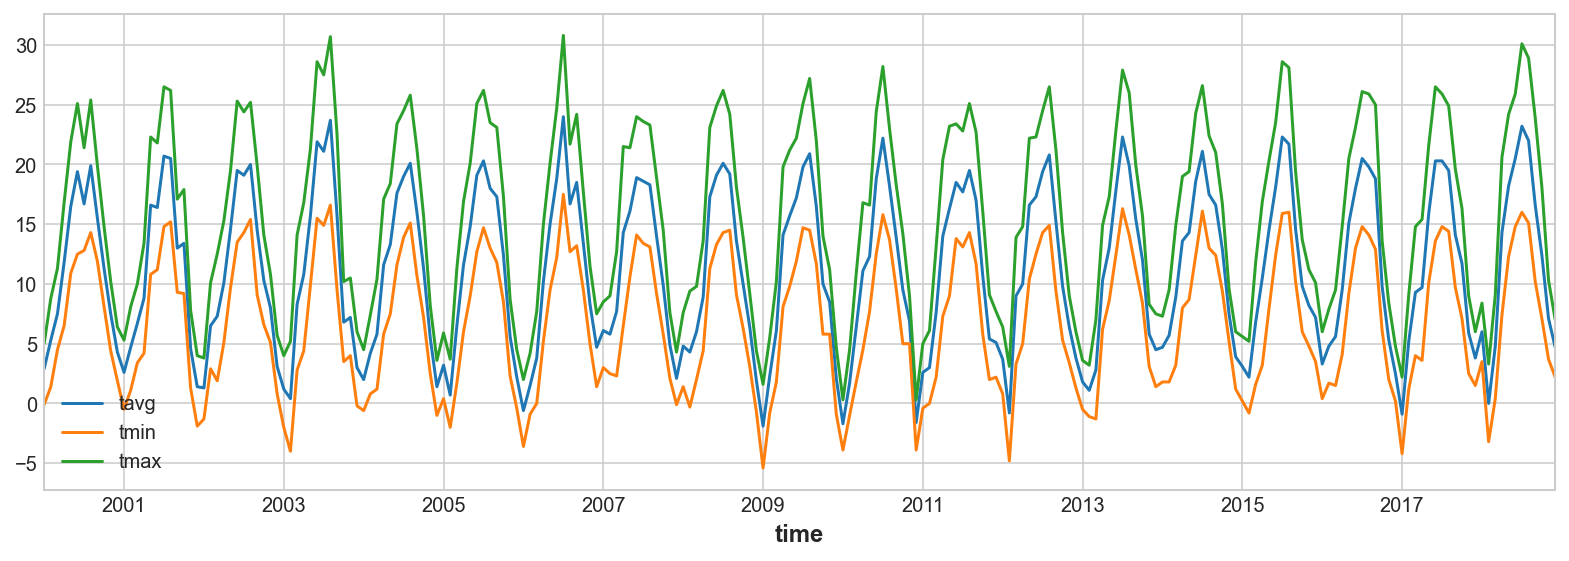

In [578]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Monthly

# Set time period
start = datetime(2000, 1, 1)
end = datetime(2018, 12, 31)

# Get Monthly data
data = Monthly('10637', start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [ ]:
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
_ = plot_pacf(flu_trends.FluVisits, lags=12)

In [18]:
train.groupby('MKB_CODE').sum('PATIENT_ID_COUNT').describe()

PATIENT_ID_COUNT
count       7644.000000
mean        1692.536630
std        17989.725347
min            1.000000
25%            6.000000
50%           40.000000
75%          284.000000
max       919789.000000

In [153]:
train.groupby('VISIT_MONTH_YEAR').sum('PATIENT_ID_COUNT').describe()

PATIENT_ID_COUNT
count         51.000000
mean      253681.372549
std        51270.812564
min       105810.000000
25%       234124.000000
50%       258120.000000
75%       281405.000000
max       347865.000000

In [172]:
grp_by_month = train
grp_by_month['month'] = pd.to_datetime(grp_by_month['VISIT_MONTH_YEAR'], format='%m.%y', errors='ignore')
grp_by_month = grp_by_month.groupby('month').sum('PATIENT_ID_COUNT')
grp_by_month.describe()

PATIENT_ID_COUNT
count         51.000000
mean      253681.372549
std        51270.812564
min       105810.000000
25%       234124.000000
50%       258120.000000
75%       281405.000000
max       347865.000000

In [173]:
grp_by_month

PATIENT_ID_COUNT
month                       
2018-01-01            221854
2018-02-01            255036
2018-03-01            263285
2018-04-01            258038
2018-05-01            237447
2018-06-01            238109
2018-07-01            239620
2018-08-01            242724
2018-09-01            253018
2018-10-01            287364
2018-11-01            272947
2018-12-01            259683
2019-01-01            240650
2019-02-01            279467
2019-03-01            275218
2019-04-01            290365
2019-05-01            243530
2019-06-01            240687
2019-07-01            262111
2019-08-01            258120
2019-09-01            280559
2019-10-01            304796
2019-11-01            269928
2019-12-01            282251
2020-01-01            189966
2020-02-01            241591
2020-03-01            233576
2020-04-01            111634
2020-05-01            105810
2020-06-01            173373
2020-07-01            217798
2020-08-01            225479
2020-09-01            261412
2020-10-01            263960
2020-11-01            224981
2020-12-01            234672
2021-01-01            150000
2021-02-01            223190
2021-03-01            275785
2021-04-01            313055
2021-05-01            294018
2021-06-01            311045
2021-07-01            316501
2021-08-01            313895
2021-09-01            328436
2021-10-01            347865
2021-11-01            328531
2021-12-01            345437
2022-01-01            190701
2022-02-01            196348
2022-03-01            261884

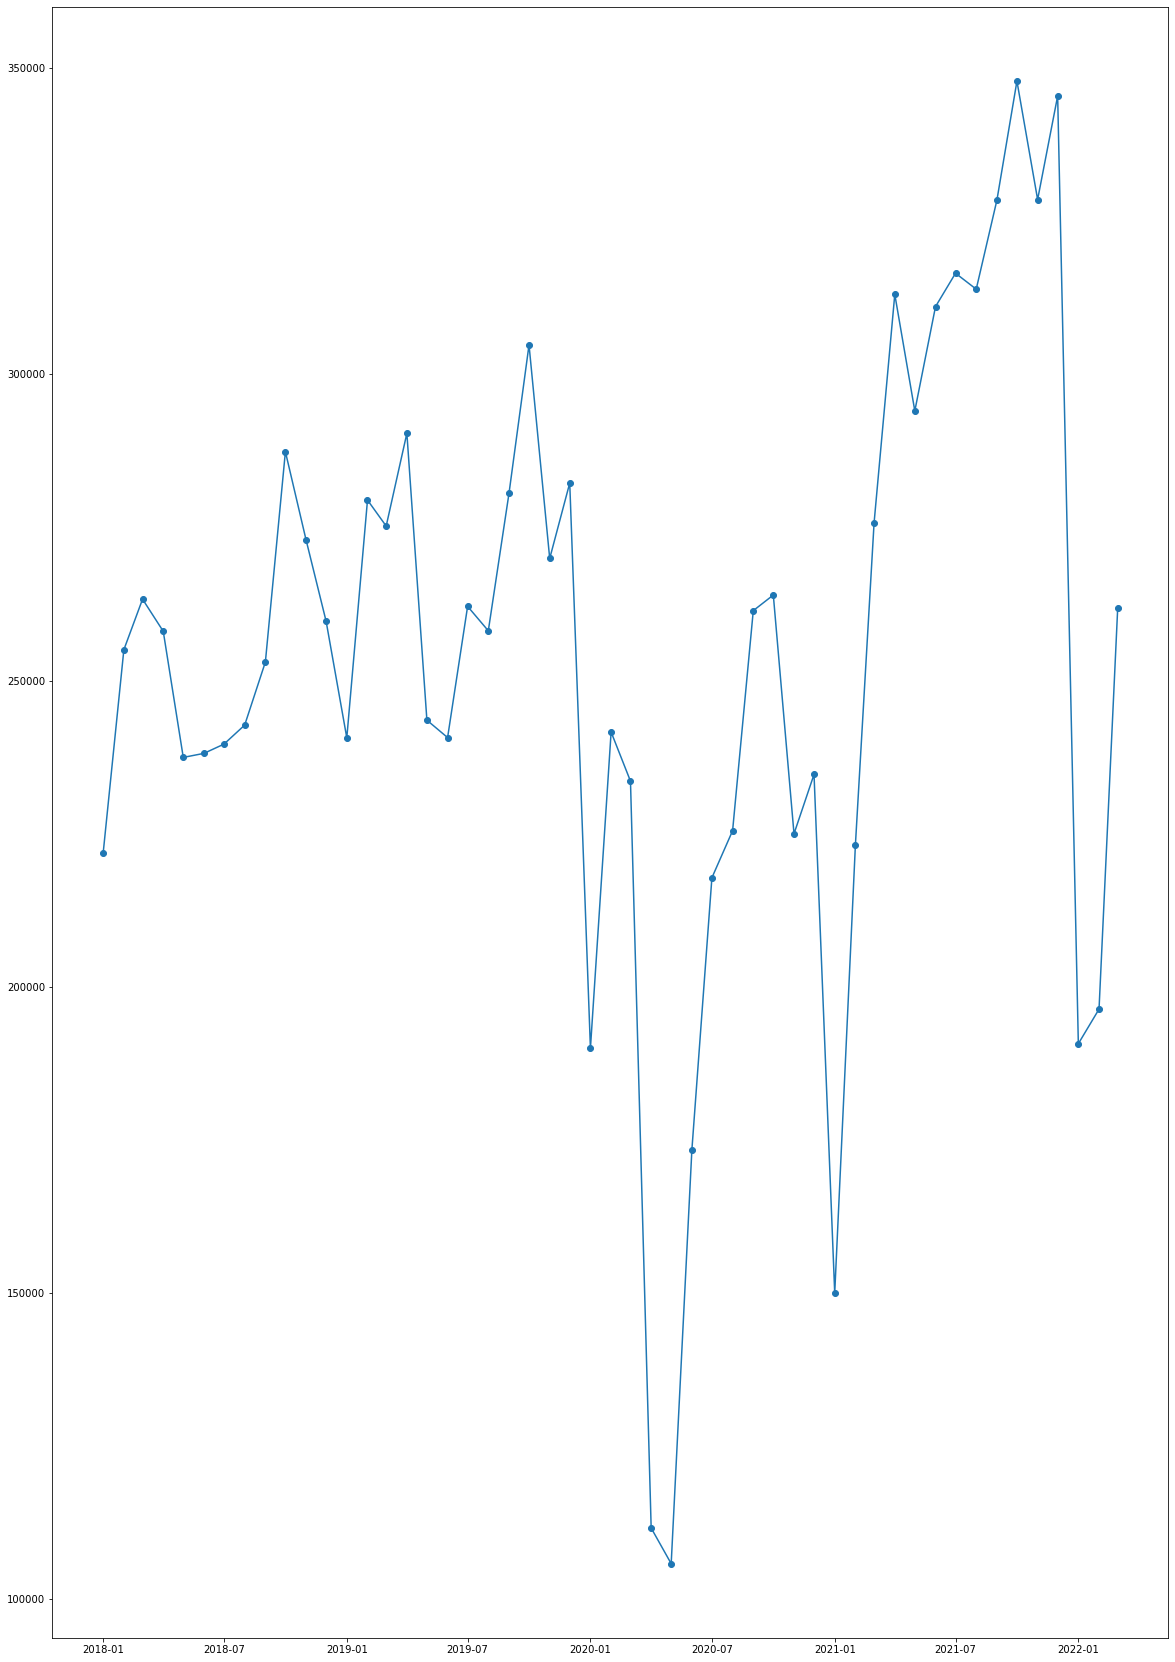

In [174]:
plt.plot(grp_by_month['PATIENT_ID_COUNT'], marker = 'o')
plt.rcParams["figure.figsize"] = (20,30)
plt.show()

In [99]:
!pip install geopy

In [114]:
!pip install geopy
!pip install geocoder

In [104]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-my-application")
location = geolocator.geocode("Балтийск Россия")
print(location.address)
#Flatiron Building, 175, 5th Avenue, Flatiron, New York, NYC, New York, ...
print((location.latitude, location.longitude))
#(40.7410861, -73.9896297241625)

Балтийск, Балтийский городской округ, Калининградская область, Северо-Западный федеральный округ, Россия
(54.6437214, 19.8941584)


In [130]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-my-application")
location = geolocator.geocode("Калининград Россия")
print(location.address)
#Flatiron Building, 175, 5th Avenue, Flatiron, New York, NYC, New York, ...
print((location.latitude, location.longitude))
#(40.7410861, -73.9896297241625)

Калининград, городской округ Калининград, Калининградская область, Северо-Западный федеральный округ, Россия
(54.710128, 20.5105838)


In [111]:
def city_state_country(row):
    coord = f"{row['Latitude']}, {row['Longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

In [113]:
row = {'Latitude': 54.64, 'Longitude': 19.89}
row = {'Latitude': 55.644466, 'Longitude': 37.395744}
city_state_country(row)

{'Latitude': 55.644466,
 'Longitude': 37.395744,
 'city': 'Москва',
 'state': 'Москва',
 'country': 'Россия'}

In [115]:
import geocoder

g = geocoder.osm([51.5074, 0.1278], method='reverse')
g.json['city']

'London'

In [139]:
import geocoder

g = geocoder.osm([54.6437214, 19.8941584], method='reverse')
#str(g).split(',').strip()
print(g.json['town'])
g.json

Балтийск


{'accuracy': 0.001,
 'address': 'Администрация Балтийского муниципального района, 6, проспект Ленина, Балтийск, Балтийский городской округ, Калининградская область, Северо-Западный федеральный округ, 238520, Россия',
 'bbox': {'northeast': [54.6435977, 19.894209],
  'southwest': [54.6429427, 19.8938801]},
 'confidence': 10,
 'country': 'Россия',
 'country_code': 'ru',
 'county': 'Балтийский городской округ',
 'housenumber': '6',
 'importance': 0.001,
 'lat': 54.6431757,
 'lng': 19.8940599350598,
 'ok': True,
 'osm_id': 170844680,
 'osm_type': 'way',
 'place_id': 145593510,
 'place_rank': 30,
 'postal': '238520',
 'quality': 'townhall',
 'raw': {'place_id': 145593510,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'way',
  'osm_id': 170844680,
  'boundingbox': ['54.6429427', '54.6435977', '19.8938801', '19.894209'],
  'lat': '54.6431757',
  'lon': '19.8940599350598',
  'display_name': 'Администрация Балтийского муниципального района,

In [125]:
!pip install meteostat

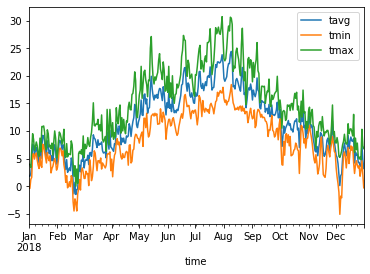

In [126]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
location = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

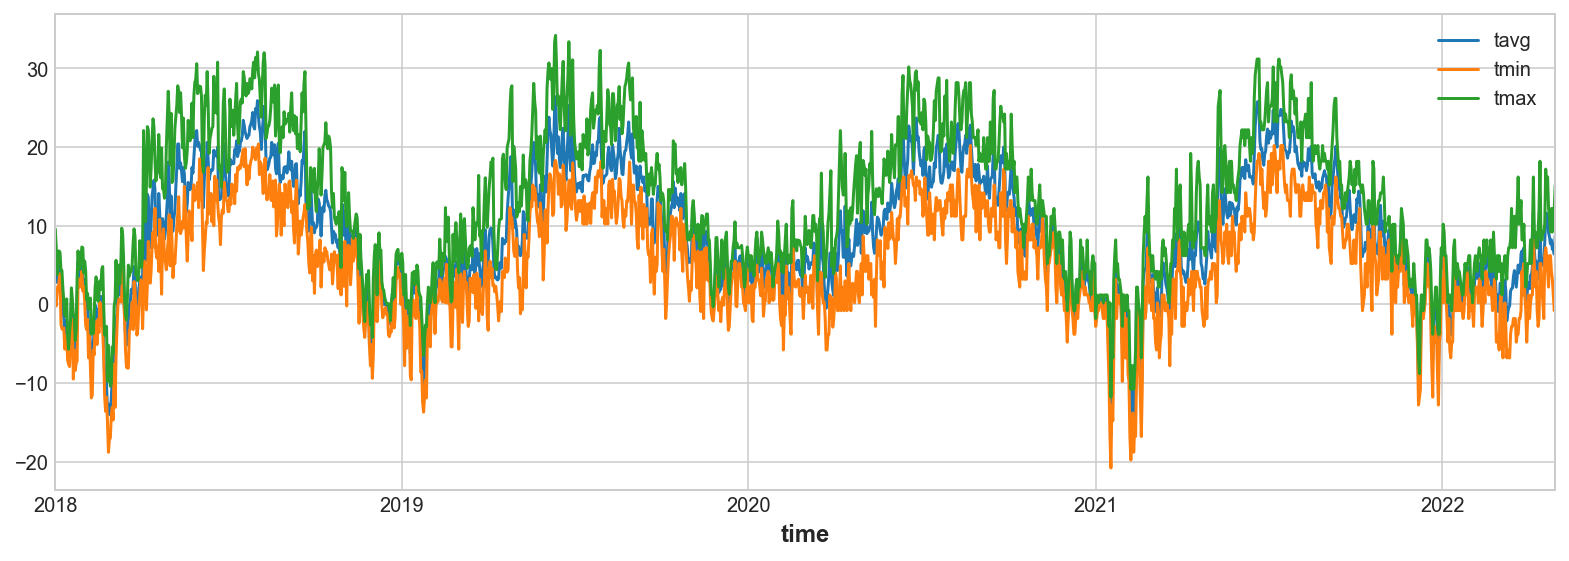

In [575]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2022, 4, 30)

# Create Point for Kaliningrad
location = Point(54.710128, 20.5105838, 0)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [93]:
import requests
import json

def get_city_opendata(city, country):
    tmp = 'https://public.opendatasoft.com/api/records/1.0/search/?dataset=worldcitiespop&q=%s&sort=population&facet=country&refine.country=%s'
    cmd = tmp % (city, country)
    res = requests.get(cmd)
    dct = json.loads(res.content)
    return dct

#    out = dct['records'][0]['fields']
#    return out

get_city_opendata('Berlin', 'de')

#{'city': 'berlin',
# 'country': 'de',
# 'region': '16',
# 'geopoint': [52.516667, 13.4],
# 'longitude': 13.4,
# 'latitude': 52.516667,
# 'accentcity': 'Berlin',
# 'population': 3398362}

get_city_opendata('San Francisco', 'us')

#{'city': 'san francisco',
# 'country': 'us',
# 'region': 'CA',
# 'geopoint': [37.775, -122.4183333],
# 'longitude': -122.4183333,
# 'latitude': 37.775,
# 'accentcity': 'San Francisco',
# 'population': 732072}

{'error': 'Unknown dataset: worldcitiespop'}

In [91]:
!pip install qwikidata

In [141]:
import qwikidata
import qwikidata.sparql

def get_city_wikidata(city, country):
    query = """
    SELECT ?city ?cityLabel ?country ?countryLabel ?population
    WHERE
    {
      ?city rdfs:label '%s'@en.
      ?city wdt:P1082 ?population.
      ?city wdt:P17 ?country.
      ?city rdfs:label ?cityLabel.
      ?country rdfs:label ?countryLabel.
      FILTER(LANG(?cityLabel) = "en").
      FILTER(LANG(?countryLabel) = "en").
      FILTER(CONTAINS(?countryLabel, "%s")).
    }
    """ % (city, country)

    res = qwikidata.sparql.return_sparql_query_results(query)
    out = res['results']['bindings'][0]
    return out

get_city_wikidata('Berlin', 'Germany')

#{'city': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q64'},
# 'population': {'datatype': 'http://www.w3.org/2001/XMLSchema#decimal',
#  'type': 'literal',
#  'value': '3613495'},
# 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q183'},
# 'cityLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Berlin'},
# 'countryLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Germany'}}

get_city_wikidata('San Francisco', 'America')

#{'city': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q62'},
# 'population': {'datatype': 'http://www.w3.org/2001/XMLSchema#decimal',
#  'type': 'literal',
#  'value': '805235'},
# 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q30'},
# 'cityLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'San Francisco'},
# 'countryLabel': {'xml:lang': 'en',
#  'type': 'literal',
#  'value': 'United States of America'}}



get_city_wikidata('Baltiysk', 'Russia')

{'city': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q5660'},
 'population': {'datatype': 'http://www.w3.org/2001/XMLSchema#decimal',
  'type': 'literal',
  'value': '33317'},
 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q159'},
 'cityLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Baltiysk'},
 'countryLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Russia'}}

In [142]:
get_city_wikidata('Kaliningrad', 'Russia')

{'city': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q1829'},
 'population': {'datatype': 'http://www.w3.org/2001/XMLSchema#decimal',
  'type': 'literal',
  'value': '475056'},
 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q159'},
 'cityLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Kaliningrad'},
 'countryLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Russia'}}

In [56]:
import matplotlib.pyplot as plt

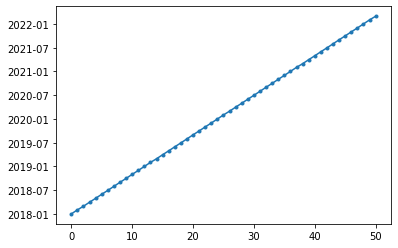

In [69]:
plt.plot(df_uniq_months.sort_values(ascending=True), marker='.')
plt.show()

In [6]:
#Разделение на train/test для локального тестирования

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [7]:
#Создание объекта данных Pool, плюсы: возможность указать какие признаки являются категориальными

pool_train = Pool(X_train, y_train, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])
pool_test = Pool(X_test, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])

In [9]:
#Объявление CatBoostRegressor и обучение

#model = CatBoostRegressor(task_type='GPU')
model = CatBoostRegressor(task_type='CPU')
model.fit(pool_train)

Learning rate set to 0.133461
0:	learn: 55.2804763	total: 1.36s	remaining: 22m 39s
1:	learn: 52.1958994	total: 1.76s	remaining: 14m 36s
2:	learn: 49.7512641	total: 2.14s	remaining: 11m 51s
3:	learn: 47.8427742	total: 2.59s	remaining: 10m 45s
4:	learn: 45.1066612	total: 3.57s	remaining: 11m 51s
5:	learn: 42.8729630	total: 4.18s	remaining: 11m 33s
6:	learn: 41.0350387	total: 4.57s	remaining: 10m 48s
7:	learn: 40.0790438	total: 5.36s	remaining: 11m 4s
8:	learn: 38.8280294	total: 6.02s	remaining: 11m 2s
9:	learn: 37.9354252	total: 6.52s	remaining: 10m 45s
10:	learn: 37.0728095	total: 6.91s	remaining: 10m 20s
11:	learn: 36.3250217	total: 7.51s	remaining: 10m 18s
12:	learn: 35.8154001	total: 7.89s	remaining: 9m 59s
13:	learn: 35.4129958	total: 8.33s	remaining: 9m 47s
14:	learn: 35.0779532	total: 8.72s	remaining: 9m 32s
15:	learn: 34.7130334	total: 9.19s	remaining: 9m 25s
16:	learn: 34.3891154	total: 9.58s	remaining: 9m 13s
17:	learn: 34.0864163	total: 9.97s	remaining: 9m 4s
18:	learn: 33.805

In [10]:
#Получение ответов модели на тестовой выборке в локальном тестировании 

y_pred = model.predict(pool_test)

In [13]:
#На локальном тестировании модель выдаёт такой результат

print("Значение метрики R2 на test: ", r2_score(y_test, y_pred))

Значение метрики R2 на test:  0.8682238751045731


In [15]:
#Формируем sample_solution. В обучении используется весь train, ответы получаем на test

pool_train_solution = Pool(X, y, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])
pool_test_solution = Pool(test, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])

#model_solution = CatBoostRegressor(task_type='GPU')
model_solution = CatBoostRegressor()
model_solution.fit(pool_train_solution)

Learning rate set to 0.138251
0:	learn: 56.2453021	total: 1.56s	remaining: 25m 55s
1:	learn: 52.9985497	total: 2.62s	remaining: 21m 49s
2:	learn: 50.3934034	total: 3.21s	remaining: 17m 46s
3:	learn: 48.2486162	total: 3.68s	remaining: 15m 16s
4:	learn: 46.4699565	total: 4.85s	remaining: 16m 5s
5:	learn: 45.0898618	total: 5.34s	remaining: 14m 45s
6:	learn: 44.0292792	total: 5.8s	remaining: 13m 43s
7:	learn: 41.9382723	total: 6.7s	remaining: 13m 51s
8:	learn: 40.4035953	total: 7.51s	remaining: 13m 46s
9:	learn: 39.0002847	total: 8.3s	remaining: 13m 41s
10:	learn: 38.2645636	total: 8.78s	remaining: 13m 9s
11:	learn: 37.3417849	total: 9.28s	remaining: 12m 44s
12:	learn: 36.5966932	total: 9.81s	remaining: 12m 24s
13:	learn: 36.1133737	total: 10.5s	remaining: 12m 17s
14:	learn: 35.7550837	total: 11.2s	remaining: 12m 14s
15:	learn: 35.3324396	total: 11.8s	remaining: 12m 7s
16:	learn: 35.0018434	total: 12.4s	remaining: 11m 54s
17:	learn: 34.6405552	total: 13.5s	remaining: 12m 19s
18:	learn: 34.

In [19]:
#Получение ответов

y_pred_solution = model.predict(pool_test_solution)

In [20]:
#Вот так они выглядят

y_pred_solution.astype(int)

array([2, 2, 2, ..., 6, 5, 5])

In [21]:
#Формируем sample_solution для отправки на платформу

test['PATIENT_ID_COUNT'] = y_pred_solution.astype(int)

In [22]:
#Сохраняем в csv файл
 
test.to_csv('sample_solution.csv', sep=';', index=None)